# DTW-Based Cleaning of Gait Database

This notebook :
1. Load patient time-series via Data_loader
2. Compute DTW distance matrix across segments.
3. Summarize distances and flag outlier segments.
4. Reconstruct a cleaned dataset.
5. Display the DTW's histograms per patient (before a/o clenned - compares)


In [2]:
import os
import sys
import re
import pandas as pd
import numpy as np
import json
os.chdir('..')
sys.path.insert(0, os.getcwd())
from DTW import dtw_not_segmented, dtw_ns_normalized, dtw_di2
from Data_loader import base_folders
output_base = "DTW segmented"
os.makedirs(output_base, exist_ok=True)
import matplotlib.pyplot as plt

In [6]:
# Run DTW
#groups = ["G01", "G03"]
groups = ["G03"]
all_stats = {}
for grp in groups:
    print(f"\n=== Processing DTW-DI for group {grp} ===")
    df_stats = dtw_di2(
        group_code   = grp,
        output_base  = output_base,
        verbose      = True,
        signal_col='Ankle Dorsiflexion RT (deg)',
    )
    all_stats[grp] = df_stats
    


=== Processing DTW-DI for group G03 ===


Patients:   0%|          | 0/40 [00:00<?, ?it/s]

Heel Strikes (Right): 234
Heel Strikes (Left): 234
[INFO] S009 S009_G03_D01_B01_T01: ciclos=233, stats={'mean': 21.579090175353272, 'median': 18.86047682083087, 'std': 12.327870296879748, 'n_pairs': 27028}
Heel Strikes (Right): 234
Heel Strikes (Left): 234
[INFO] S009 S009_G03_D01_B01_T02: ciclos=233, stats={'mean': 19.25750965602195, 'median': 16.592875426190474, 'std': 11.301188934487351, 'n_pairs': 27028}
Heel Strikes (Right): 232
Heel Strikes (Left): 231
[INFO] S009 S009_G03_D01_B01_T03: ciclos=231, stats={'mean': 15.854016245777792, 'median': 14.02102846224762, 'std': 8.523649122114826, 'n_pairs': 26565}
Heel Strikes (Right): 228
Heel Strikes (Left): 228
[INFO] S009 S009_G03_D01_B02_T01: ciclos=227, stats={'mean': 17.27714661942524, 'median': 15.203397542645478, 'std': 9.520602719074727, 'n_pairs': 25651}
Heel Strikes (Right): 230
Heel Strikes (Left): 230
[INFO] S009 S009_G03_D01_B02_T02: ciclos=229, stats={'mean': 17.096285788317616, 'median': 15.214685372890816, 'std': 9.2485443

Patients:   2%|▎         | 1/40 [00:46<30:30, 46.94s/it]

[INFO] S009 S009_G03_D02_B03_T03: ciclos=221, stats={'mean': 14.75344544500762, 'median': 13.098551396772365, 'std': 7.950645138216794, 'n_pairs': 24310}
Heel Strikes (Right): 80
Heel Strikes (Left): 80
[INFO] S013 S013_G03_D01_B01_T01: ciclos=79, stats={'mean': 12.149723271172856, 'median': 10.506283955971275, 'std': 6.341007180996559, 'n_pairs': 3081}
Heel Strikes (Right): 112
Heel Strikes (Left): 113
[INFO] S013 S013_G03_D01_B01_T02: ciclos=111, stats={'mean': 11.852348614544816, 'median': 9.721681085742812, 'std': 6.976773305107134, 'n_pairs': 6105}
Heel Strikes (Right): 230
Heel Strikes (Left): 231
[INFO] S013 S013_G03_D01_B01_T03: ciclos=229, stats={'mean': 11.45005947863615, 'median': 10.166599888350596, 'std': 5.749782316421338, 'n_pairs': 26106}
Heel Strikes (Right): 231
Heel Strikes (Left): 230
[INFO] S013 S013_G03_D01_B02_T01: ciclos=230, stats={'mean': 12.937927762035814, 'median': 10.752316590762947, 'std': 7.8285022524866035, 'n_pairs': 26335}
Heel Strikes (Right): 229
He

Patients:   5%|▌         | 2/40 [01:32<29:19, 46.30s/it]

[INFO] S013 S013_G03_D02_B03_T03: ciclos=227, stats={'mean': 8.976855735672894, 'median': 8.404444240710733, 'std': 3.9574762282401585, 'n_pairs': 25651}
Heel Strikes (Right): 202
Heel Strikes (Left): 202
[INFO] S040 S040_G03_D01_B01_T01: ciclos=201, stats={'mean': 9.212805870512705, 'median': 7.940340863537704, 'std': 4.784317213727124, 'n_pairs': 20100}
Heel Strikes (Right): 206
Heel Strikes (Left): 205
[INFO] S040 S040_G03_D01_B01_T02: ciclos=205, stats={'mean': 7.5911570693514365, 'median': 6.800455363518768, 'std': 3.506449376702336, 'n_pairs': 20910}
Heel Strikes (Right): 207
Heel Strikes (Left): 207
[INFO] S040 S040_G03_D01_B01_T03: ciclos=206, stats={'mean': 7.578219977847184, 'median': 6.594462332292638, 'std': 3.881825504094522, 'n_pairs': 21115}
Heel Strikes (Right): 209
Heel Strikes (Left): 210
[INFO] S040 S040_G03_D01_B02_T01: ciclos=208, stats={'mean': 7.430197936622043, 'median': 6.760501405864695, 'std': 3.235296779053895, 'n_pairs': 21528}
Heel Strikes (Right): 210
Hee

Patients:   8%|▊         | 3/40 [02:20<28:51, 46.81s/it]

[INFO] S040 S040_G03_D02_B03_T03: ciclos=205, stats={'mean': 7.3043849776413765, 'median': 6.3985482515423335, 'std': 3.6225079025183198, 'n_pairs': 20910}
Heel Strikes (Right): 193
Heel Strikes (Left): 194
[INFO] S081 S081_G03_D01_B01_T01: ciclos=192, stats={'mean': 8.190606098726079, 'median': 7.3297851010663395, 'std': 3.960875548729979, 'n_pairs': 18336}
Heel Strikes (Right): 195
Heel Strikes (Left): 196
[INFO] S081 S081_G03_D01_B01_T02: ciclos=194, stats={'mean': 7.568984584545166, 'median': 6.94549878830069, 'std': 3.1966936881698955, 'n_pairs': 18721}
Heel Strikes (Right): 197
Heel Strikes (Left): 197
[INFO] S081 S081_G03_D01_B01_T03: ciclos=196, stats={'mean': 7.081691081606573, 'median': 6.585197864674825, 'std': 2.7399877080027264, 'n_pairs': 19110}
Heel Strikes (Right): 201
Heel Strikes (Left): 200
[INFO] S081 S081_G03_D01_B02_T01: ciclos=200, stats={'mean': 7.3657010024395095, 'median': 6.9458062491942165, 'std': 2.7189601263238323, 'n_pairs': 19900}
Heel Strikes (Right): 2

Patients:  10%|█         | 4/40 [03:09<28:36, 47.67s/it]

[INFO] S081 S081_G03_D02_B03_T03: ciclos=207, stats={'mean': 8.229189342837232, 'median': 7.62109134937853, 'std': 3.3398355544786744, 'n_pairs': 21321}
Heel Strikes (Right): 200
Heel Strikes (Left): 200
[INFO] S102 S102_G03_D01_B01_T01: ciclos=199, stats={'mean': 12.96885606072025, 'median': 11.762697932812948, 'std': 5.817830934361748, 'n_pairs': 19701}
Heel Strikes (Right): 206
Heel Strikes (Left): 204
[INFO] S102 S102_G03_D01_B01_T02: ciclos=205, stats={'mean': 11.785544892962564, 'median': 10.903884331005369, 'std': 4.990844856387143, 'n_pairs': 20910}
Heel Strikes (Right): 207
Heel Strikes (Left): 206
[INFO] S102 S102_G03_D01_B01_T03: ciclos=206, stats={'mean': 11.247396254580995, 'median': 10.511388200624634, 'std': 4.47037760222407, 'n_pairs': 21115}
Heel Strikes (Right): 211
Heel Strikes (Left): 210
[INFO] S102 S102_G03_D01_B02_T01: ciclos=210, stats={'mean': 10.910710996156727, 'median': 10.090811161083856, 'std': 4.522125226969647, 'n_pairs': 21945}
Heel Strikes (Right): 211

Patients:  12%|█▎        | 5/40 [03:57<27:58, 47.96s/it]

[INFO] S102 S102_G03_D02_B03_T03: ciclos=212, stats={'mean': 11.168873625403675, 'median': 10.338057657751623, 'std': 4.64898000631063, 'n_pairs': 22366}
Heel Strikes (Right): 192
Heel Strikes (Left): 192
[INFO] S103 S103_G03_D01_B01_T01: ciclos=191, stats={'mean': 9.577591818233097, 'median': 8.943391957315306, 'std': 3.907117336109231, 'n_pairs': 18145}
Heel Strikes (Right): 199
Heel Strikes (Left): 199
[INFO] S103 S103_G03_D01_B01_T02: ciclos=198, stats={'mean': 8.677732294453422, 'median': 7.908678996923984, 'std': 3.9976835387336793, 'n_pairs': 19503}
Heel Strikes (Right): 202
Heel Strikes (Left): 202
[INFO] S103 S103_G03_D01_B01_T03: ciclos=201, stats={'mean': 8.42169829795254, 'median': 7.816780634638377, 'std': 3.2878472870377244, 'n_pairs': 20100}
Heel Strikes (Right): 202
Heel Strikes (Left): 202
[INFO] S103 S103_G03_D01_B02_T01: ciclos=201, stats={'mean': 9.092086342151102, 'median': 8.245217002759127, 'std': 3.9498398874984564, 'n_pairs': 20100}
Heel Strikes (Right): 199
He

Patients:  15%|█▌        | 6/40 [04:45<27:14, 48.06s/it]

[INFO] S103 S103_G03_D02_B03_T03: ciclos=202, stats={'mean': 8.726578959190714, 'median': 8.146023602188986, 'std': 3.3432440838525683, 'n_pairs': 20301}
Heel Strikes (Right): 203
Heel Strikes (Left): 203
[INFO] S104 S104_G03_D01_B01_T01: ciclos=202, stats={'mean': 9.840608057567195, 'median': 8.880350369496586, 'std': 4.853656519755484, 'n_pairs': 20301}
Heel Strikes (Right): 201
Heel Strikes (Left): 201
[INFO] S104 S104_G03_D01_B01_T02: ciclos=200, stats={'mean': 8.189226096753371, 'median': 7.481340213515008, 'std': 3.4958413037502742, 'n_pairs': 19900}
Heel Strikes (Right): 201
Heel Strikes (Left): 200
[INFO] S104 S104_G03_D01_B01_T03: ciclos=200, stats={'mean': 7.601670467636705, 'median': 6.840758542529526, 'std': 3.483995096895115, 'n_pairs': 19900}
Heel Strikes (Right): 202
Heel Strikes (Left): 203
[INFO] S104 S104_G03_D01_B02_T01: ciclos=201, stats={'mean': 7.6756292193873055, 'median': 7.031512527783625, 'std': 3.219242772197073, 'n_pairs': 20100}
Heel Strikes (Right): 206
He

Patients:  18%|█▊        | 7/40 [05:09<22:00, 40.01s/it]

[INFO] S104 S104_G03_D01_B03_T03: ciclos=207, stats={'mean': 8.428069465910808, 'median': 7.532159670630876, 'std': 3.9060956013747576, 'n_pairs': 21321}
Heel Strikes (Right): 204
Heel Strikes (Left): 203
[INFO] S107 S107_G03_D01_B01_T01: ciclos=203, stats={'mean': 7.970668032306146, 'median': 7.528770143641234, 'std': 2.889217448431998, 'n_pairs': 20503}
Heel Strikes (Right): 206
Heel Strikes (Left): 207
[INFO] S107 S107_G03_D01_B01_T02: ciclos=205, stats={'mean': 7.967782932604393, 'median': 7.608413456844344, 'std': 2.74002796026023, 'n_pairs': 20910}
Heel Strikes (Right): 209
Heel Strikes (Left): 209
[INFO] S107 S107_G03_D01_B01_T03: ciclos=208, stats={'mean': 7.157315747205769, 'median': 6.813729529646238, 'std': 2.4112794743824795, 'n_pairs': 21528}
Heel Strikes (Right): 209
Heel Strikes (Left): 209
[INFO] S107 S107_G03_D01_B02_T01: ciclos=208, stats={'mean': 8.232094496350449, 'median': 7.533619972761115, 'std': 3.465609466838894, 'n_pairs': 21528}
Heel Strikes (Right): 210
Heel

Patients:  20%|██        | 8/40 [05:56<22:30, 42.20s/it]

[INFO] S107 S107_G03_D02_B03_T03: ciclos=209, stats={'mean': 6.493112926412605, 'median': 5.943602988008739, 'std': 2.6651380124379034, 'n_pairs': 21736}
Heel Strikes (Right): 203
Heel Strikes (Left): 204
[INFO] S109 S109_G03_D01_B01_T01: ciclos=202, stats={'mean': 10.449270621561967, 'median': 9.515018130638742, 'std': 4.766519249216751, 'n_pairs': 20301}
Heel Strikes (Right): 207
Heel Strikes (Left): 206
[INFO] S109 S109_G03_D01_B01_T02: ciclos=206, stats={'mean': 7.973528904400416, 'median': 7.239579087353406, 'std': 3.4672093481979203, 'n_pairs': 21115}
Heel Strikes (Right): 205
Heel Strikes (Left): 205
[INFO] S109 S109_G03_D01_B01_T03: ciclos=204, stats={'mean': 8.24540802910974, 'median': 7.498525351481039, 'std': 3.8125379167149216, 'n_pairs': 20706}
Heel Strikes (Right): 209
Heel Strikes (Left): 208
[INFO] S109 S109_G03_D01_B02_T01: ciclos=208, stats={'mean': 8.268963055195028, 'median': 7.503257726566887, 'std': 3.7732818251691502, 'n_pairs': 21528}
Heel Strikes (Right): 205
H

Patients:  22%|██▎       | 9/40 [06:43<22:32, 43.63s/it]

[INFO] S109 S109_G03_D02_B03_T03: ciclos=201, stats={'mean': 8.490054262097535, 'median': 7.752302350161013, 'std': 3.8314093417287314, 'n_pairs': 20100}
Heel Strikes (Right): 197
Heel Strikes (Left): 196
[INFO] S110 S110_G03_D01_B01_T01: ciclos=196, stats={'mean': 11.014271641223923, 'median': 9.821763685007245, 'std': 5.340020133349184, 'n_pairs': 19110}
Heel Strikes (Right): 198
Heel Strikes (Left): 199
[INFO] S110 S110_G03_D01_B01_T02: ciclos=197, stats={'mean': 10.764596632107704, 'median': 9.20278807193176, 'std': 5.87479733107734, 'n_pairs': 19306}
Heel Strikes (Right): 198
Heel Strikes (Left): 198
[INFO] S110 S110_G03_D01_B01_T03: ciclos=197, stats={'mean': 12.10906177870317, 'median': 9.71778028019965, 'std': 7.79628782168593, 'n_pairs': 19306}
Heel Strikes (Right): 202
Heel Strikes (Left): 202
[INFO] S110 S110_G03_D01_B02_T01: ciclos=201, stats={'mean': 9.547837332729111, 'median': 8.239099918319841, 'std': 4.983481481520587, 'n_pairs': 20100}
Heel Strikes (Right): 206
Heel S

Patients:  25%|██▌       | 10/40 [07:29<22:14, 44.48s/it]

[INFO] S110 S110_G03_D02_B03_T03: ciclos=208, stats={'mean': 8.021450967820705, 'median': 7.439478025647169, 'std': 3.0910723461988607, 'n_pairs': 21528}
Heel Strikes (Right): 178
Heel Strikes (Left): 179
[INFO] S112 S112_G03_D01_B01_T01: ciclos=177, stats={'mean': 9.498804919211036, 'median': 8.990454993764626, 'std': 3.3058470694997406, 'n_pairs': 15576}
Heel Strikes (Right): 179
Heel Strikes (Left): 179
[INFO] S112 S112_G03_D01_B01_T02: ciclos=178, stats={'mean': 8.30865840401282, 'median': 7.805993767807803, 'std': 2.9991795644548263, 'n_pairs': 15753}
Heel Strikes (Right): 180
Heel Strikes (Left): 180
[INFO] S112 S112_G03_D01_B01_T03: ciclos=179, stats={'mean': 9.292834591473158, 'median': 8.623484489483284, 'std': 3.594721225554943, 'n_pairs': 15931}
Heel Strikes (Right): 181
Heel Strikes (Left): 181
[INFO] S112 S112_G03_D01_B02_T01: ciclos=180, stats={'mean': 7.890918413669488, 'median': 7.401825686192753, 'std': 2.8369563863087373, 'n_pairs': 16110}
Heel Strikes (Right): 182
He

Patients:  28%|██▊       | 11/40 [08:16<21:56, 45.41s/it]

[INFO] S112 S112_G03_D02_B03_T03: ciclos=183, stats={'mean': 9.039779631513236, 'median': 8.353126534522954, 'std': 3.768531885746275, 'n_pairs': 16653}
Heel Strikes (Right): 203
Heel Strikes (Left): 204
[INFO] S113 S113_G03_D01_B01_T01: ciclos=202, stats={'mean': 5.93292161168595, 'median': 5.494303547482409, 'std': 2.164460326148292, 'n_pairs': 20301}
Heel Strikes (Right): 205
Heel Strikes (Left): 205
[INFO] S113 S113_G03_D01_B01_T02: ciclos=204, stats={'mean': 5.353092495314117, 'median': 5.04454124222671, 'std': 1.744434339199891, 'n_pairs': 20706}
Heel Strikes (Right): 206
Heel Strikes (Left): 205
[INFO] S113 S113_G03_D01_B01_T03: ciclos=205, stats={'mean': 5.49416602145213, 'median': 5.030144422561407, 'std': 2.1516572500686153, 'n_pairs': 20910}
Heel Strikes (Right): 207
Heel Strikes (Left): 207
[INFO] S113 S113_G03_D01_B02_T01: ciclos=206, stats={'mean': 5.462082521442857, 'median': 5.162779466947752, 'std': 1.8218532206128522, 'n_pairs': 21115}
Heel Strikes (Right): 207
Heel S

Patients:  30%|███       | 12/40 [09:02<21:14, 45.53s/it]

[INFO] S113 S113_G03_D02_B03_T03: ciclos=209, stats={'mean': 4.712699126259324, 'median': 4.260890571232535, 'std': 1.9234924512177285, 'n_pairs': 21736}
Heel Strikes (Right): 223
Heel Strikes (Left): 222
[INFO] S116 S116_G03_D01_B01_T01: ciclos=222, stats={'mean': 11.314168101079135, 'median': 10.200884510060282, 'std': 5.441063511499986, 'n_pairs': 24531}
Heel Strikes (Right): 226
Heel Strikes (Left): 227
[INFO] S116 S116_G03_D01_B01_T02: ciclos=225, stats={'mean': 9.533991303883717, 'median': 8.89278848110844, 'std': 3.91859510170674, 'n_pairs': 25200}
Heel Strikes (Right): 226
Heel Strikes (Left): 226
[INFO] S116 S116_G03_D01_B01_T03: ciclos=225, stats={'mean': 10.553096925622336, 'median': 9.70227892303724, 'std': 4.699981138162252, 'n_pairs': 25200}
Heel Strikes (Right): 228
Heel Strikes (Left): 227
[INFO] S116 S116_G03_D01_B02_T01: ciclos=227, stats={'mean': 9.635202935305205, 'median': 9.042216353034277, 'std': 3.908538947473776, 'n_pairs': 25651}
Heel Strikes (Right): 231
Heel

Patients:  32%|███▎      | 13/40 [09:47<20:22, 45.29s/it]

[INFO] S116 S116_G03_D02_B03_T03: ciclos=235, stats={'mean': 10.233072640048812, 'median': 9.521666158188966, 'std': 4.269923206034648, 'n_pairs': 27495}
Heel Strikes (Right): 209
Heel Strikes (Left): 209
[INFO] S119 S119_G03_D01_B01_T01: ciclos=208, stats={'mean': 7.353451860869902, 'median': 6.552540989383518, 'std': 3.772176055346261, 'n_pairs': 21528}
Heel Strikes (Right): 206
Heel Strikes (Left): 207
[INFO] S119 S119_G03_D01_B01_T02: ciclos=205, stats={'mean': 5.709193914812195, 'median': 5.391127397129437, 'std': 1.9949382706140115, 'n_pairs': 20910}
Heel Strikes (Right): 206
Heel Strikes (Left): 207
[INFO] S119 S119_G03_D01_B01_T03: ciclos=205, stats={'mean': 6.655676761390372, 'median': 6.26417614207832, 'std': 2.4507830436025566, 'n_pairs': 20910}
Heel Strikes (Right): 209
Heel Strikes (Left): 210
[INFO] S119 S119_G03_D01_B02_T01: ciclos=208, stats={'mean': 6.156916412361988, 'median': 5.79831533227911, 'std': 2.280014100514298, 'n_pairs': 21528}
Heel Strikes (Right): 208
Heel

Patients:  35%|███▌      | 14/40 [10:33<19:44, 45.58s/it]

[INFO] S119 S119_G03_D02_B03_T03: ciclos=215, stats={'mean': 6.156045833286239, 'median': 5.702779030623145, 'std': 2.4483440453045504, 'n_pairs': 23005}
Heel Strikes (Right): 212
Heel Strikes (Left): 212
[INFO] S120 S120_G03_D01_B01_T01: ciclos=211, stats={'mean': 7.068117783154167, 'median': 6.492847059480491, 'std': 3.023273577628849, 'n_pairs': 22155}
Heel Strikes (Right): 211
Heel Strikes (Left): 211
[INFO] S120 S120_G03_D01_B01_T02: ciclos=210, stats={'mean': 7.080131855282826, 'median': 6.510940501639994, 'std': 3.0369400790726844, 'n_pairs': 21945}
Heel Strikes (Right): 214
Heel Strikes (Left): 214
[INFO] S120 S120_G03_D01_B01_T03: ciclos=213, stats={'mean': 7.591067548127386, 'median': 6.82413024024771, 'std': 3.5984617609390757, 'n_pairs': 22578}
Heel Strikes (Right): 217
Heel Strikes (Left): 216
[INFO] S120 S120_G03_D01_B02_T01: ciclos=216, stats={'mean': 7.03818046595595, 'median': 6.573165661382884, 'std': 2.8780430707051132, 'n_pairs': 23220}
Heel Strikes (Right): 216
Hee

Patients:  38%|███▊      | 15/40 [11:19<18:58, 45.53s/it]

[INFO] S120 S120_G03_D02_B03_T03: ciclos=206, stats={'mean': 8.69586207943681, 'median': 7.8903717746207, 'std': 4.109282306507703, 'n_pairs': 21115}
Heel Strikes (Right): 248
Heel Strikes (Left): 248
[INFO] S123 S123_G03_D01_B01_T01: ciclos=247, stats={'mean': 9.358956352622707, 'median': 8.536286053164492, 'std': 4.173006097989835, 'n_pairs': 30381}
Heel Strikes (Right): 250
Heel Strikes (Left): 250
[INFO] S123 S123_G03_D01_B01_T02: ciclos=249, stats={'mean': 8.218643379594115, 'median': 7.631372000218194, 'std': 3.3124994882823913, 'n_pairs': 30876}
Heel Strikes (Right): 251
Heel Strikes (Left): 252
[INFO] S123 S123_G03_D01_B01_T03: ciclos=250, stats={'mean': 8.799441753790566, 'median': 8.03105912983978, 'std': 3.887290783881737, 'n_pairs': 31125}
Heel Strikes (Right): 250
Heel Strikes (Left): 250
[INFO] S123 S123_G03_D01_B02_T01: ciclos=249, stats={'mean': 9.585578210083735, 'median': 8.731801874664328, 'std': 4.394445438616509, 'n_pairs': 30876}
Heel Strikes (Right): 248
Heel Str

Patients:  40%|████      | 16/40 [12:05<18:20, 45.85s/it]

[INFO] S123 S123_G03_D02_B03_T03: ciclos=251, stats={'mean': 7.805843615076492, 'median': 7.320432476636374, 'std': 3.1215187616528963, 'n_pairs': 31375}
Heel Strikes (Right): 197
Heel Strikes (Left): 198
[INFO] S125 S125_G03_D01_B01_T01: ciclos=196, stats={'mean': 7.83944032066295, 'median': 6.8468295370003, 'std': 4.703679795315212, 'n_pairs': 19110}
Heel Strikes (Right): 193
Heel Strikes (Left): 193
[INFO] S125 S125_G03_D01_B01_T02: ciclos=192, stats={'mean': 7.0602490758658405, 'median': 6.472853703839881, 'std': 2.9430426909545115, 'n_pairs': 18336}
Heel Strikes (Right): 196
Heel Strikes (Left): 197
[INFO] S125 S125_G03_D01_B01_T03: ciclos=195, stats={'mean': 7.03948161962334, 'median': 6.4016697380635135, 'std': 3.0200624452039877, 'n_pairs': 18915}
Heel Strikes (Right): 195
Heel Strikes (Left): 195
[INFO] S125 S125_G03_D01_B02_T01: ciclos=194, stats={'mean': 6.8178733412543515, 'median': 6.105840088245875, 'std': 3.1616872698928717, 'n_pairs': 18721}
Heel Strikes (Right): 193
He

Patients:  42%|████▎     | 17/40 [12:52<17:44, 46.27s/it]

[INFO] S125 S125_G03_D02_B03_T03: ciclos=197, stats={'mean': 7.529689442215013, 'median': 6.891547777033352, 'std': 3.182863094490777, 'n_pairs': 19306}
Heel Strikes (Right): 206
Heel Strikes (Left): 206
[INFO] S126 S126_G03_D01_B01_T01: ciclos=205, stats={'mean': 8.26809930297334, 'median': 7.61292165189235, 'std': 3.5108539098848386, 'n_pairs': 20910}
Heel Strikes (Right): 120
Heel Strikes (Left): 119
[INFO] S126 S126_G03_D01_B01_T02: ciclos=119, stats={'mean': 9.513899357995657, 'median': 8.60929751783154, 'std': 4.431503102227126, 'n_pairs': 7021}
Heel Strikes (Right): 160
Heel Strikes (Left): 160
[INFO] S126 S126_G03_D01_B01_T03: ciclos=159, stats={'mean': 7.1685562988394596, 'median': 6.515406659694883, 'std': 3.0627857844177737, 'n_pairs': 12561}
Heel Strikes (Right): 177
Heel Strikes (Left): 178
[INFO] S126 S126_G03_D01_B02_T01: ciclos=176, stats={'mean': 11.595106927641035, 'median': 10.0044827901687, 'std': 6.333065420193382, 'n_pairs': 15400}
Heel Strikes (Right): 114
Heel S

Patients:  45%|████▌     | 18/40 [13:09<13:41, 37.33s/it]

[INFO] S126 S126_G03_D01_B03_T03: ciclos=130, stats={'mean': 9.0624688100172, 'median': 8.200934193650303, 'std': 4.211063902418189, 'n_pairs': 8385}
Heel Strikes (Right): 194
Heel Strikes (Left): 194
[INFO] S127 S127_G03_D01_B01_T01: ciclos=193, stats={'mean': 10.687074830881265, 'median': 9.396318091087844, 'std': 5.678122457801073, 'n_pairs': 18528}
Heel Strikes (Right): 198
Heel Strikes (Left): 199
[INFO] S127 S127_G03_D01_B01_T02: ciclos=197, stats={'mean': 9.826411088173689, 'median': 8.972811131666894, 'std': 4.388053647616788, 'n_pairs': 19306}
Heel Strikes (Right): 199
Heel Strikes (Left): 199
[INFO] S127 S127_G03_D01_B01_T03: ciclos=198, stats={'mean': 9.887560885762394, 'median': 8.998692904553726, 'std': 4.639748157962671, 'n_pairs': 19503}
Heel Strikes (Right): 203
Heel Strikes (Left): 203
[INFO] S127 S127_G03_D01_B02_T01: ciclos=202, stats={'mean': 11.244560043897899, 'median': 9.689478355156513, 'std': 6.953702051363377, 'n_pairs': 20301}
Heel Strikes (Right): 201
Heel S

Patients:  48%|████▊     | 19/40 [13:55<13:57, 39.90s/it]

[INFO] S127 S127_G03_D02_B03_T03: ciclos=211, stats={'mean': 8.68382661758153, 'median': 8.22072896831121, 'std': 3.521236191074903, 'n_pairs': 22155}
Heel Strikes (Right): 222
Heel Strikes (Left): 222
[INFO] S128 S128_G03_D01_B01_T01: ciclos=221, stats={'mean': 8.919077640028826, 'median': 8.09209768593, 'std': 4.084454282932999, 'n_pairs': 24310}
Heel Strikes (Right): 238
Heel Strikes (Left): 237
[INFO] S128 S128_G03_D01_B01_T02: ciclos=237, stats={'mean': 8.220871527025771, 'median': 7.517327176608997, 'std': 3.5367595757866193, 'n_pairs': 27966}
Heel Strikes (Right): 238
Heel Strikes (Left): 238
[INFO] S128 S128_G03_D01_B01_T03: ciclos=237, stats={'mean': 8.955145863897952, 'median': 8.0262643257049, 'std': 4.3117641072970825, 'n_pairs': 27966}
Heel Strikes (Right): 239
Heel Strikes (Left): 240
[INFO] S128 S128_G03_D01_B02_T01: ciclos=238, stats={'mean': 8.989222675605566, 'median': 8.1915645866617, 'std': 4.033003588490964, 'n_pairs': 28203}
Heel Strikes (Right): 242
Heel Strikes 

Patients:  50%|█████     | 20/40 [14:42<14:02, 42.12s/it]

[INFO] S128 S128_G03_D02_B03_T03: ciclos=231, stats={'mean': 7.655514977313395, 'median': 6.7924269614240735, 'std': 3.7415915804213298, 'n_pairs': 26565}
Heel Strikes (Right): 222
Heel Strikes (Left): 223
[INFO] S129 S129_G03_D01_B01_T01: ciclos=221, stats={'mean': 7.729468805720327, 'median': 7.1336286711019765, 'std': 3.306938223150531, 'n_pairs': 24310}
Heel Strikes (Right): 224
Heel Strikes (Left): 223
[INFO] S129 S129_G03_D01_B01_T02: ciclos=223, stats={'mean': 7.178374649719526, 'median': 6.53027020071991, 'std': 3.1518848844445055, 'n_pairs': 24753}
Heel Strikes (Right): 226
Heel Strikes (Left): 227
[INFO] S129 S129_G03_D01_B01_T03: ciclos=225, stats={'mean': 8.520303986904043, 'median': 7.293403606210136, 'std': 4.7489526055533915, 'n_pairs': 25200}
Heel Strikes (Right): 230
Heel Strikes (Left): 229
[INFO] S129 S129_G03_D01_B02_T01: ciclos=229, stats={'mean': 7.506925440579012, 'median': 6.909472969728702, 'std': 3.2354492666099084, 'n_pairs': 26106}
Heel Strikes (Right): 230


Patients:  52%|█████▎    | 21/40 [15:29<13:44, 43.41s/it]

[INFO] S129 S129_G03_D02_B03_T03: ciclos=231, stats={'mean': 5.947680807567449, 'median': 5.5114175452501355, 'std': 2.2059639454077704, 'n_pairs': 26565}
Heel Strikes (Right): 217
Heel Strikes (Left): 217
[INFO] S130 S130_G03_D01_B01_T01: ciclos=216, stats={'mean': 11.441580533180169, 'median': 10.100970192721624, 'std': 5.660714508986976, 'n_pairs': 23220}
Heel Strikes (Right): 219
Heel Strikes (Left): 220
[INFO] S130 S130_G03_D01_B01_T02: ciclos=218, stats={'mean': 14.151628656366924, 'median': 11.707075728148428, 'std': 8.491805632735272, 'n_pairs': 23653}
Heel Strikes (Right): 222
Heel Strikes (Left): 221
[INFO] S130 S130_G03_D01_B01_T03: ciclos=221, stats={'mean': 12.086539352222372, 'median': 10.06969474683872, 'std': 7.532225793074322, 'n_pairs': 24310}
Heel Strikes (Right): 223
Heel Strikes (Left): 223
[INFO] S130 S130_G03_D01_B02_T01: ciclos=222, stats={'mean': 13.629745802069111, 'median': 11.05892811402197, 'std': 8.4906601209017, 'n_pairs': 24531}
Heel Strikes (Right): 221

Patients:  55%|█████▌    | 22/40 [16:16<13:21, 44.51s/it]

[INFO] S130 S130_G03_D02_B03_T03: ciclos=228, stats={'mean': 10.952263250132251, 'median': 8.565039394367425, 'std': 7.5876767708342, 'n_pairs': 25878}
Heel Strikes (Right): 181
Heel Strikes (Left): 182
[INFO] S131 S131_G03_D01_B01_T01: ciclos=180, stats={'mean': 12.884064963905745, 'median': 11.74502181685055, 'std': 6.08432548007243, 'n_pairs': 16110}
Heel Strikes (Right): 181
Heel Strikes (Left): 181
[INFO] S131 S131_G03_D01_B01_T02: ciclos=180, stats={'mean': 11.050354207732559, 'median': 9.973142931272164, 'std': 5.368653402272431, 'n_pairs': 16110}
Heel Strikes (Right): 180
Heel Strikes (Left): 180
[INFO] S131 S131_G03_D01_B01_T03: ciclos=179, stats={'mean': 10.86443415422464, 'median': 9.650363168596321, 'std': 5.741592651206907, 'n_pairs': 15931}
Heel Strikes (Right): 179
Heel Strikes (Left): 179
[INFO] S131 S131_G03_D01_B02_T01: ciclos=178, stats={'mean': 10.099928769620359, 'median': 9.200782340168766, 'std': 4.678456657510753, 'n_pairs': 15753}
Heel Strikes (Right): 178
Heel

Patients:  57%|█████▊    | 23/40 [17:03<12:51, 45.39s/it]

[INFO] S131 S131_G03_D02_B03_T03: ciclos=179, stats={'mean': 8.69603575849425, 'median': 8.105870905028533, 'std': 3.7397661739434787, 'n_pairs': 15931}
Heel Strikes (Right): 222
Heel Strikes (Left): 223
[INFO] S133 S133_G03_D01_B01_T01: ciclos=221, stats={'mean': 13.05684790255743, 'median': 12.361696567848401, 'std': 5.2648684778601575, 'n_pairs': 24310}
Heel Strikes (Right): 222
Heel Strikes (Left): 223
[INFO] S133 S133_G03_D01_B01_T02: ciclos=221, stats={'mean': 12.946385651690981, 'median': 12.181778169339632, 'std': 5.209431609395062, 'n_pairs': 24310}
Heel Strikes (Right): 228
Heel Strikes (Left): 228
[INFO] S133 S133_G03_D01_B01_T03: ciclos=227, stats={'mean': 13.245026217165389, 'median': 12.239440703291683, 'std': 5.620397844769891, 'n_pairs': 25651}
Heel Strikes (Right): 232
Heel Strikes (Left): 232
[INFO] S133 S133_G03_D01_B02_T01: ciclos=231, stats={'mean': 13.177867799495909, 'median': 11.898055830549762, 'std': 6.135784570400747, 'n_pairs': 26565}
Heel Strikes (Right): 2

Patients:  60%|██████    | 24/40 [17:52<12:23, 46.46s/it]

[INFO] S133 S133_G03_D02_B03_T03: ciclos=238, stats={'mean': 7.646452674597553, 'median': 6.7349627626336055, 'std': 3.8208632346571676, 'n_pairs': 28203}
Heel Strikes (Right): 174
Heel Strikes (Left): 174
[INFO] S134 S134_G03_D01_B01_T01: ciclos=173, stats={'mean': 23.462352870588358, 'median': 24.556466034357058, 'std': 11.177470133031143, 'n_pairs': 14878}
Heel Strikes (Right): 177
Heel Strikes (Left): 177
[INFO] S134 S134_G03_D01_B01_T02: ciclos=176, stats={'mean': 21.15639645529164, 'median': 22.746497283988734, 'std': 11.57729199830561, 'n_pairs': 15400}
Heel Strikes (Right): 180
Heel Strikes (Left): 179
[INFO] S134 S134_G03_D01_B01_T03: ciclos=179, stats={'mean': 24.640817444954735, 'median': 24.96773753932994, 'std': 12.089587546772865, 'n_pairs': 15931}
Heel Strikes (Right): 177
Heel Strikes (Left): 178
[INFO] S134 S134_G03_D01_B02_T01: ciclos=176, stats={'mean': 21.890619770969224, 'median': 23.6867148795273, 'std': 11.746830649814, 'n_pairs': 15400}
Heel Strikes (Right): 180

Patients:  62%|██████▎   | 25/40 [18:38<11:35, 46.37s/it]

[INFO] S134 S134_G03_D02_B03_T03: ciclos=184, stats={'mean': 25.886455586455476, 'median': 27.931315220148836, 'std': 12.355479813715593, 'n_pairs': 16836}
Heel Strikes (Right): 222
Heel Strikes (Left): 222
[INFO] S135 S135_G03_D01_B01_T01: ciclos=221, stats={'mean': 8.562007087874731, 'median': 7.884981545221163, 'std': 3.684140831056002, 'n_pairs': 24310}
Heel Strikes (Right): 223
Heel Strikes (Left): 224
[INFO] S135 S135_G03_D01_B01_T02: ciclos=222, stats={'mean': 8.555024671195758, 'median': 7.736948789753857, 'std': 3.9649437239307463, 'n_pairs': 24531}
Heel Strikes (Right): 224
Heel Strikes (Left): 225
[INFO] S135 S135_G03_D01_B01_T03: ciclos=223, stats={'mean': 8.18923371123464, 'median': 7.616120786442856, 'std': 3.3083344488315958, 'n_pairs': 24753}
Heel Strikes (Right): 226
Heel Strikes (Left): 227
[INFO] S135 S135_G03_D01_B02_T01: ciclos=225, stats={'mean': 9.345478286090918, 'median': 8.492572556009243, 'std': 4.188888464344096, 'n_pairs': 25200}
Heel Strikes (Right): 229
H

Patients:  65%|██████▌   | 26/40 [19:26<10:53, 46.67s/it]

[INFO] S135 S135_G03_D02_B03_T03: ciclos=220, stats={'mean': 7.102732626390804, 'median': 6.500652235856746, 'std': 2.9678995725593778, 'n_pairs': 24090}
Heel Strikes (Right): 218
Heel Strikes (Left): 217
[INFO] S136 S136_G03_D01_B01_T01: ciclos=217, stats={'mean': 6.870577689997272, 'median': 6.034682832271374, 'std': 3.384347619543311, 'n_pairs': 23436}
Heel Strikes (Right): 222
Heel Strikes (Left): 221
[INFO] S136 S136_G03_D01_B01_T02: ciclos=221, stats={'mean': 5.854976279903803, 'median': 5.271600214171523, 'std': 2.548354366042764, 'n_pairs': 24310}
Heel Strikes (Right): 223
Heel Strikes (Left): 222
[INFO] S136 S136_G03_D01_B01_T03: ciclos=222, stats={'mean': 5.069359098904166, 'median': 4.608904603198386, 'std': 2.0917590117370444, 'n_pairs': 24531}
Heel Strikes (Right): 223
Heel Strikes (Left): 223
[INFO] S136 S136_G03_D01_B02_T01: ciclos=222, stats={'mean': 5.734082380223062, 'median': 5.21037854300775, 'std': 2.4423657655832245, 'n_pairs': 24531}
Heel Strikes (Right): 223
Hee

Patients:  68%|██████▊   | 27/40 [20:14<10:12, 47.10s/it]

[INFO] S136 S136_G03_D02_B03_T03: ciclos=223, stats={'mean': 5.498278990449397, 'median': 4.920360823970994, 'std': 2.489799091941465, 'n_pairs': 24753}
Heel Strikes (Right): 218
Heel Strikes (Left): 218
[INFO] S137 S137_G03_D01_B01_T01: ciclos=217, stats={'mean': 6.964222805994558, 'median': 6.504002089337533, 'std': 2.7404928311551444, 'n_pairs': 23436}
Heel Strikes (Right): 219
Heel Strikes (Left): 220
[INFO] S137 S137_G03_D01_B01_T02: ciclos=218, stats={'mean': 6.43232496001238, 'median': 6.053236314549313, 'std': 2.376611274271947, 'n_pairs': 23653}
Heel Strikes (Right): 220
Heel Strikes (Left): 220
[INFO] S137 S137_G03_D01_B01_T03: ciclos=219, stats={'mean': 7.210264194008408, 'median': 6.683546077134052, 'std': 2.9426159185376184, 'n_pairs': 23871}
Heel Strikes (Right): 222
Heel Strikes (Left): 221
[INFO] S137 S137_G03_D01_B02_T01: ciclos=221, stats={'mean': 7.367445886319893, 'median': 6.8445121314211015, 'std': 3.050276902198855, 'n_pairs': 24310}
Heel Strikes (Right): 221
Hee

Patients:  70%|███████   | 28/40 [21:01<09:24, 47.04s/it]

[INFO] S137 S137_G03_D02_B03_T03: ciclos=220, stats={'mean': 6.806488508267206, 'median': 6.345771273284317, 'std': 2.6846854261853177, 'n_pairs': 24090}
Heel Strikes (Right): 231
Heel Strikes (Left): 231
[INFO] S138 S138_G03_D01_B01_T01: ciclos=230, stats={'mean': 6.915707366095666, 'median': 6.0786389654472055, 'std': 3.3736493128279776, 'n_pairs': 26335}
Heel Strikes (Right): 233
Heel Strikes (Left): 233
[INFO] S138 S138_G03_D01_B01_T02: ciclos=232, stats={'mean': 6.259726135217607, 'median': 5.760099113330494, 'std': 2.466414337886451, 'n_pairs': 26796}
Heel Strikes (Right): 239
Heel Strikes (Left): 240
[INFO] S138 S138_G03_D01_B01_T03: ciclos=238, stats={'mean': 6.361837693936814, 'median': 5.861543738488512, 'std': 2.524975899458148, 'n_pairs': 28203}
Heel Strikes (Right): 243
Heel Strikes (Left): 244
[INFO] S138 S138_G03_D01_B02_T01: ciclos=242, stats={'mean': 7.114599565885844, 'median': 6.511944680839477, 'std': 3.0011587337935257, 'n_pairs': 29161}
Heel Strikes (Right): 246
H

Patients:  72%|███████▎  | 29/40 [21:47<08:34, 46.78s/it]

[INFO] S138 S138_G03_D02_B03_T03: ciclos=244, stats={'mean': 8.861832042027165, 'median': 7.630707306373319, 'std': 4.667680802753579, 'n_pairs': 29646}
Heel Strikes (Right): 210
Heel Strikes (Left): 209
[INFO] S139 S139_G03_D01_B01_T01: ciclos=209, stats={'mean': 11.163573763765754, 'median': 10.298021805140078, 'std': 5.020113063755732, 'n_pairs': 21736}
Heel Strikes (Right): 214
Heel Strikes (Left): 214
[INFO] S139 S139_G03_D01_B01_T02: ciclos=213, stats={'mean': 10.834659089329463, 'median': 9.847587989299587, 'std': 5.317545188279794, 'n_pairs': 22578}
Heel Strikes (Right): 215
Heel Strikes (Left): 216
[INFO] S139 S139_G03_D01_B01_T03: ciclos=214, stats={'mean': 10.069990563423591, 'median': 9.378663118092177, 'std': 4.384656239652439, 'n_pairs': 22791}
Heel Strikes (Right): 215
Heel Strikes (Left): 215
[INFO] S139 S139_G03_D01_B02_T01: ciclos=214, stats={'mean': 9.235317019814307, 'median': 8.297127154279247, 'std': 4.424920646219469, 'n_pairs': 22791}
Heel Strikes (Right): 217
H

Patients:  75%|███████▌  | 30/40 [22:34<07:49, 46.98s/it]

[INFO] S139 S139_G03_D02_B03_T03: ciclos=222, stats={'mean': 8.616313854596221, 'median': 7.835493940313955, 'std': 3.820185542175812, 'n_pairs': 24531}
Heel Strikes (Right): 205
Heel Strikes (Left): 206
[INFO] S140 S140_G03_D01_B01_T01: ciclos=204, stats={'mean': 10.251894024441874, 'median': 9.40702793091028, 'std': 4.579362413541403, 'n_pairs': 20706}
Heel Strikes (Right): 208
Heel Strikes (Left): 208
[INFO] S140 S140_G03_D01_B01_T02: ciclos=207, stats={'mean': 9.466432253272599, 'median': 8.636301560866146, 'std': 4.333983020165989, 'n_pairs': 21321}
Heel Strikes (Right): 210
Heel Strikes (Left): 209
[INFO] S140 S140_G03_D01_B01_T03: ciclos=209, stats={'mean': 8.804465783296664, 'median': 7.998446285716908, 'std': 4.117350971114522, 'n_pairs': 21736}
Heel Strikes (Right): 211
Heel Strikes (Left): 211
[INFO] S140 S140_G03_D01_B02_T01: ciclos=210, stats={'mean': 9.430817866790633, 'median': 8.35158905181783, 'std': 4.783901657993577, 'n_pairs': 21945}
Heel Strikes (Right): 213
Heel S

Patients:  78%|███████▊  | 31/40 [23:22<07:04, 47.19s/it]

[INFO] S140 S140_G03_D02_B03_T03: ciclos=216, stats={'mean': 6.987927014034862, 'median': 6.427030528866003, 'std': 2.95269271671693, 'n_pairs': 23220}
Heel Strikes (Right): 219
Heel Strikes (Left): 219
[INFO] S141 S141_G03_D01_B01_T01: ciclos=218, stats={'mean': 9.329801346289004, 'median': 8.281173428506547, 'std': 4.709405671813193, 'n_pairs': 23653}
Heel Strikes (Right): 217
Heel Strikes (Left): 217
[INFO] S141 S141_G03_D01_B01_T02: ciclos=216, stats={'mean': 9.806963228879418, 'median': 8.27958730809589, 'std': 5.942140717503406, 'n_pairs': 23220}
Heel Strikes (Right): 216
Heel Strikes (Left): 218
[INFO] S141 S141_G03_D01_B01_T03: ciclos=215, stats={'mean': 8.862589738224816, 'median': 7.592194061487358, 'std': 4.997732483579582, 'n_pairs': 23005}
Heel Strikes (Right): 219
Heel Strikes (Left): 219
[INFO] S141 S141_G03_D01_B02_T01: ciclos=218, stats={'mean': 9.003554326215799, 'median': 7.698812378681697, 'std': 5.351850032039833, 'n_pairs': 23653}
Heel Strikes (Right): 220
Heel St

Patients:  80%|████████  | 32/40 [24:09<06:17, 47.22s/it]

[INFO] S141 S141_G03_D02_B03_T03: ciclos=215, stats={'mean': 9.478868542567707, 'median': 7.890368414676272, 'std': 5.714783184666015, 'n_pairs': 23005}
Heel Strikes (Right): 197
Heel Strikes (Left): 196
[INFO] S142 S142_G03_D01_B01_T01: ciclos=196, stats={'mean': 9.138495676870225, 'median': 8.76482167303006, 'std': 3.6530250232887167, 'n_pairs': 19110}
Heel Strikes (Right): 198
Heel Strikes (Left): 198
[INFO] S142 S142_G03_D01_B01_T02: ciclos=197, stats={'mean': 8.764740288407838, 'median': 8.381414816935589, 'std': 3.400833436792733, 'n_pairs': 19306}
Heel Strikes (Right): 199
Heel Strikes (Left): 200
[INFO] S142 S142_G03_D01_B01_T03: ciclos=198, stats={'mean': 7.819900980089462, 'median': 7.364936362490033, 'std': 3.1976751552989344, 'n_pairs': 19503}
Heel Strikes (Right): 202
Heel Strikes (Left): 202
[INFO] S142 S142_G03_D01_B02_T01: ciclos=201, stats={'mean': 7.6465678489332545, 'median': 6.878825898460537, 'std': 3.611839033105563, 'n_pairs': 20100}
Heel Strikes (Right): 204
Hee

Patients:  82%|████████▎ | 33/40 [24:54<05:24, 46.40s/it]

[INFO] S142 S142_G03_D02_B03_T03: ciclos=212, stats={'mean': 7.087311543983548, 'median': 6.415101048261493, 'std': 3.0787263197308885, 'n_pairs': 22366}
Heel Strikes (Right): 184
Heel Strikes (Left): 185
[INFO] S143 S143_G03_D01_B01_T01: ciclos=183, stats={'mean': 7.216407169180889, 'median': 6.726607165432557, 'std': 2.939266720210404, 'n_pairs': 16653}
Heel Strikes (Right): 188
Heel Strikes (Left): 187
[INFO] S143 S143_G03_D01_B01_T02: ciclos=187, stats={'mean': 7.585595464962276, 'median': 7.021453602725109, 'std': 3.339005896480405, 'n_pairs': 17391}
Heel Strikes (Right): 187
Heel Strikes (Left): 187
[INFO] S143 S143_G03_D01_B01_T03: ciclos=186, stats={'mean': 6.477944309340928, 'median': 5.9917089658133005, 'std': 2.6602726162797854, 'n_pairs': 17205}
Heel Strikes (Right): 188
Heel Strikes (Left): 188
[INFO] S143 S143_G03_D01_B02_T01: ciclos=187, stats={'mean': 7.9087335036902315, 'median': 7.128253121591745, 'std': 3.7294194895195423, 'n_pairs': 17391}
Heel Strikes (Right): 191


Patients:  85%|████████▌ | 34/40 [25:38<04:33, 45.67s/it]

[INFO] S143 S143_G03_D02_B03_T03: ciclos=194, stats={'mean': 7.4881514092546855, 'median': 6.835753026248845, 'std': 3.2973271336073156, 'n_pairs': 18721}
Heel Strikes (Right): 221
Heel Strikes (Left): 220
[INFO] S145 S145_G03_D01_B01_T01: ciclos=220, stats={'mean': 10.219510826474325, 'median': 9.21032850039009, 'std': 4.7570705115475045, 'n_pairs': 24090}
Heel Strikes (Right): 224
Heel Strikes (Left): 224
[INFO] S145 S145_G03_D01_B01_T02: ciclos=223, stats={'mean': 9.74799110756559, 'median': 8.881397637508833, 'std': 4.32617699635461, 'n_pairs': 24753}
Heel Strikes (Right): 225
Heel Strikes (Left): 225
[INFO] S145 S145_G03_D01_B01_T03: ciclos=224, stats={'mean': 10.19514351742746, 'median': 9.304359835823753, 'std': 4.5723732612247705, 'n_pairs': 24976}
Heel Strikes (Right): 226
Heel Strikes (Left): 226
[INFO] S145 S145_G03_D01_B02_T01: ciclos=225, stats={'mean': 10.033349452429933, 'median': 9.01542937358068, 'std': 4.675130720673638, 'n_pairs': 25200}
Heel Strikes (Right): 227
Hee

Patients:  88%|████████▊ | 35/40 [26:23<03:47, 45.46s/it]

[INFO] S145 S145_G03_D02_B03_T03: ciclos=231, stats={'mean': 10.375079077394272, 'median': 9.11150184908254, 'std': 5.165599072754768, 'n_pairs': 26565}
Heel Strikes (Right): 202
Heel Strikes (Left): 202
[INFO] S146 S146_G03_D01_B01_T01: ciclos=201, stats={'mean': 7.978710965300125, 'median': 6.90588855114307, 'std': 4.328991624130872, 'n_pairs': 20100}
Heel Strikes (Right): 211
Heel Strikes (Left): 211
[INFO] S146 S146_G03_D01_B01_T02: ciclos=210, stats={'mean': 7.148249652135249, 'median': 6.459014226838803, 'std': 3.4183890763269025, 'n_pairs': 21945}
Heel Strikes (Right): 211
Heel Strikes (Left): 212
[INFO] S146 S146_G03_D01_B01_T03: ciclos=210, stats={'mean': 7.8824157258335745, 'median': 7.2150443547922745, 'std': 3.4822011262345343, 'n_pairs': 21945}
Heel Strikes (Right): 211
Heel Strikes (Left): 210
[INFO] S146 S146_G03_D01_B02_T01: ciclos=210, stats={'mean': 8.793123656862, 'median': 7.553412038273293, 'std': 4.984929657579647, 'n_pairs': 21945}
Heel Strikes (Right): 211
Heel 

Patients:  90%|█████████ | 36/40 [27:09<03:03, 45.75s/it]

[INFO] S146 S146_G03_D02_B03_T03: ciclos=215, stats={'mean': 8.698178600828918, 'median': 7.609196218669364, 'std': 4.499416243371427, 'n_pairs': 23005}
Heel Strikes (Right): 216
Heel Strikes (Left): 217
[INFO] S154 S154_G03_D01_B01_T01: ciclos=215, stats={'mean': 9.105629756954066, 'median': 8.016154481465351, 'std': 4.6874207995088, 'n_pairs': 23005}
Heel Strikes (Right): 219
Heel Strikes (Left): 219
[INFO] S154 S154_G03_D01_B01_T02: ciclos=218, stats={'mean': 8.882926089864691, 'median': 7.8512577119173566, 'std': 4.525631322612727, 'n_pairs': 23653}
Heel Strikes (Right): 219
Heel Strikes (Left): 218
[INFO] S154 S154_G03_D01_B01_T03: ciclos=218, stats={'mean': 8.8408456769351, 'median': 7.8202033975814, 'std': 4.375412951758819, 'n_pairs': 23653}
Heel Strikes (Right): 223
Heel Strikes (Left): 222
[INFO] S154 S154_G03_D01_B02_T01: ciclos=222, stats={'mean': 9.272455412715047, 'median': 8.099251667647762, 'std': 4.916783972417915, 'n_pairs': 24531}
Heel Strikes (Right): 223
Heel Strik

Patients:  92%|█████████▎| 37/40 [27:56<02:18, 46.02s/it]

[INFO] S154 S154_G03_D02_B03_T03: ciclos=226, stats={'mean': 8.609150066164187, 'median': 7.585696473347696, 'std': 4.506864607316438, 'n_pairs': 25425}
Heel Strikes (Right): 231
Heel Strikes (Left): 230
[INFO] S156 S156_G03_D01_B01_T01: ciclos=230, stats={'mean': 7.9684114265217385, 'median': 7.393033114396999, 'std': 2.9287969263718954, 'n_pairs': 26335}
Heel Strikes (Right): 242
Heel Strikes (Left): 242
[INFO] S156 S156_G03_D01_B01_T02: ciclos=241, stats={'mean': 6.969011300476165, 'median': 6.4162954743517435, 'std': 2.555092728131307, 'n_pairs': 28920}
Heel Strikes (Right): 251
Heel Strikes (Left): 251
[INFO] S156 S156_G03_D01_B01_T03: ciclos=250, stats={'mean': 6.997676288488826, 'median': 6.538947096339691, 'std': 2.479608744872234, 'n_pairs': 31125}
Heel Strikes (Right): 234
Heel Strikes (Left): 234
[INFO] S156 S156_G03_D01_B02_T01: ciclos=233, stats={'mean': 7.308412307420976, 'median': 6.8177113130317375, 'std': 2.4837183543900787, 'n_pairs': 27028}
Heel Strikes (Right): 235


Patients:  95%|█████████▌| 38/40 [28:42<01:32, 46.22s/it]

[INFO] S156 S156_G03_D02_B03_T03: ciclos=241, stats={'mean': 6.887206689745351, 'median': 6.43987267289469, 'std': 2.3689692408890424, 'n_pairs': 28920}
Heel Strikes (Right): 219
Heel Strikes (Left): 220
[INFO] S157 S157_G03_D01_B01_T01: ciclos=218, stats={'mean': 9.467566896972361, 'median': 8.683550290069705, 'std': 4.166086053283676, 'n_pairs': 23653}
Heel Strikes (Right): 225
Heel Strikes (Left): 225
[INFO] S157 S157_G03_D01_B01_T02: ciclos=224, stats={'mean': 8.723951691505851, 'median': 8.120836167395876, 'std': 3.753501444694844, 'n_pairs': 24976}
Heel Strikes (Right): 226
Heel Strikes (Left): 226
[INFO] S157 S157_G03_D01_B01_T03: ciclos=225, stats={'mean': 9.11779028985675, 'median': 8.474124877081813, 'std': 3.9125351339076855, 'n_pairs': 25200}
Heel Strikes (Right): 228
Heel Strikes (Left): 227
[INFO] S157 S157_G03_D01_B02_T01: ciclos=227, stats={'mean': 8.27047477291352, 'median': 7.626488372859673, 'std': 3.549481724759524, 'n_pairs': 25651}
Heel Strikes (Right): 227
Heel S

Patients:  98%|█████████▊| 39/40 [29:27<00:45, 45.84s/it]

[INFO] S157 S157_G03_D02_B03_T03: ciclos=234, stats={'mean': 9.271440599459284, 'median': 8.360943302389368, 'std': 4.075699191953744, 'n_pairs': 27261}
Heel Strikes (Right): 197
Heel Strikes (Left): 197
[INFO] S158 S158_G03_D01_B01_T01: ciclos=196, stats={'mean': 7.576737760269518, 'median': 6.638835072929662, 'std': 3.6806738106401413, 'n_pairs': 19110}
Heel Strikes (Right): 193
Heel Strikes (Left): 194
[INFO] S158 S158_G03_D01_B01_T02: ciclos=192, stats={'mean': 6.763362843823234, 'median': 6.034555369661101, 'std': 3.0962037408435954, 'n_pairs': 18336}
Heel Strikes (Right): 194
Heel Strikes (Left): 193
[INFO] S158 S158_G03_D01_B01_T03: ciclos=193, stats={'mean': 5.9841646053739455, 'median': 5.365720882100739, 'std': 2.7921194354524226, 'n_pairs': 18528}
Heel Strikes (Right): 193
Heel Strikes (Left): 193
[INFO] S158 S158_G03_D01_B02_T01: ciclos=192, stats={'mean': 6.505573430743239, 'median': 5.98607390523315, 'std': 2.6230339187899943, 'n_pairs': 18336}
Heel Strikes (Right): 192
H

Patients: 100%|██████████| 40/40 [30:15<00:00, 45.39s/it]

[INFO] S158 S158_G03_D02_B03_T03: ciclos=196, stats={'mean': 7.521813704367291, 'median': 6.775724432891041, 'std': 3.47350247531115, 'n_pairs': 19110}
[OK] Nested DTW results → DTW segmented/dtw_all_cdist.json
  patient_id              trial_id  n_cycles  n_pairs       mean     median  \
0       S009  S009_G03_D01_B01_T01       233    27028  21.579090  18.860477   
1       S009  S009_G03_D01_B01_T02       233    27028  19.257510  16.592875   
2       S009  S009_G03_D01_B01_T03       231    26565  15.854016  14.021028   
3       S009  S009_G03_D01_B02_T01       227    25651  17.277147  15.203398   
4       S009  S009_G03_D01_B02_T02       229    26106  17.096286  15.214685   

         std  
0  12.327870  
1  11.301189  
2   8.523649  
3   9.520603  
4   9.248544  


## Analysis for the DTW on the segmented signal 

In [3]:
# Inspect the saved intra-trial DTW results 
csv_path  = os.path.join(output_base, 'dtw_intra_trial_stats_cdist_G01.csv')
json_path = os.path.join(output_base, 'dtw_intra_trial_stats_cdist_G01.json')

print("CSV preview:")
display(pd.read_csv(csv_path).head())

#print("\nJSON preview:")
#with open(json_path, 'r') as f:
    #j = json.load(f)
# show first patient/trial entry
#first_pid = next(iter(j))
#first_trial = next(iter(j[first_pid]))
#print(first_pid, first_trial, j[first_pid][first_trial])


CSV preview:


,patient_id,trial_id,n_cycles,n_pairs,mean,median,std
0,S001,S001_G01_D01_B01_T01,192,18336,10.973635,9.610401,5.917077
1,S001,S001_G01_D01_B01_T02,194,18721,9.591990,8.291341,5.220677
2,S001,S001_G01_D01_B01_T03,194,18721,10.763567,9.523951,5.485653
3,S001,S001_G01_D01_B02_T01,194,18721,10.846166,9.268432,5.970911
4,S001,S001_G01_D01_B02_T02,193,18528,10.520060,8.995119,5.852647


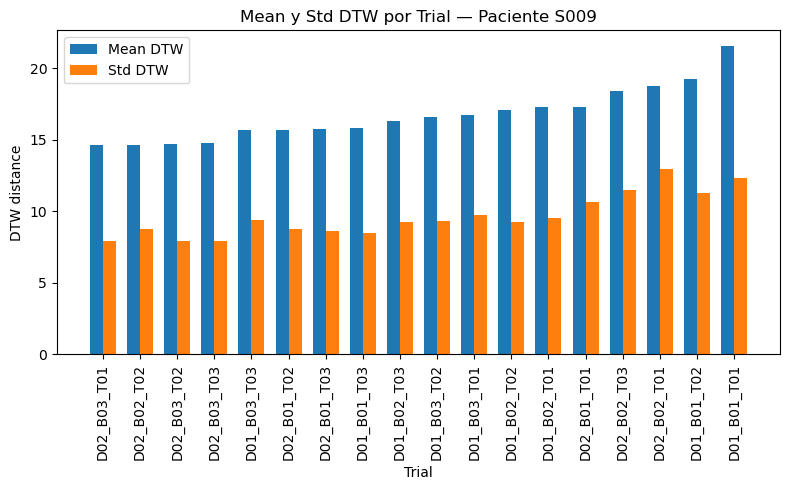

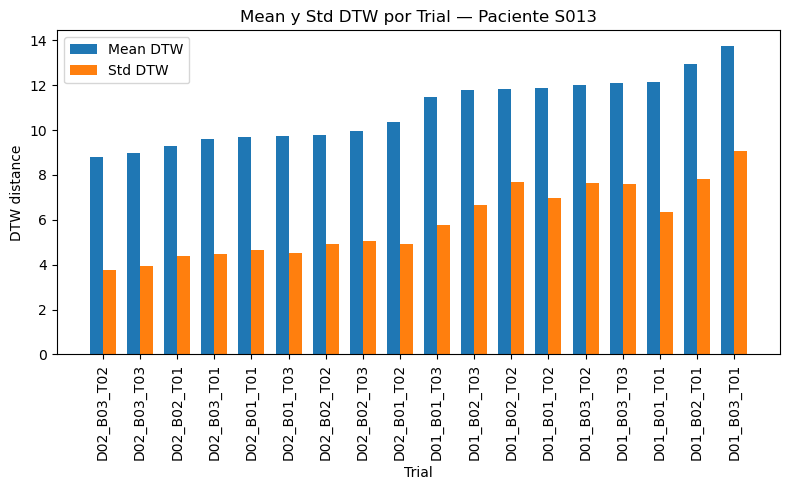

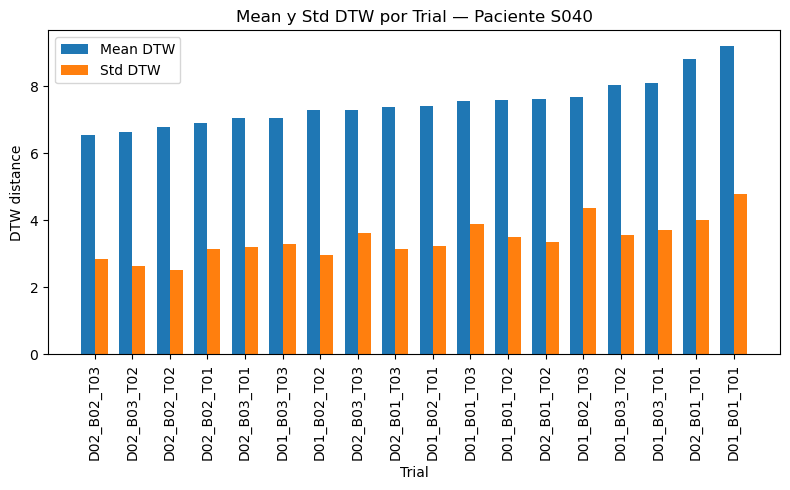

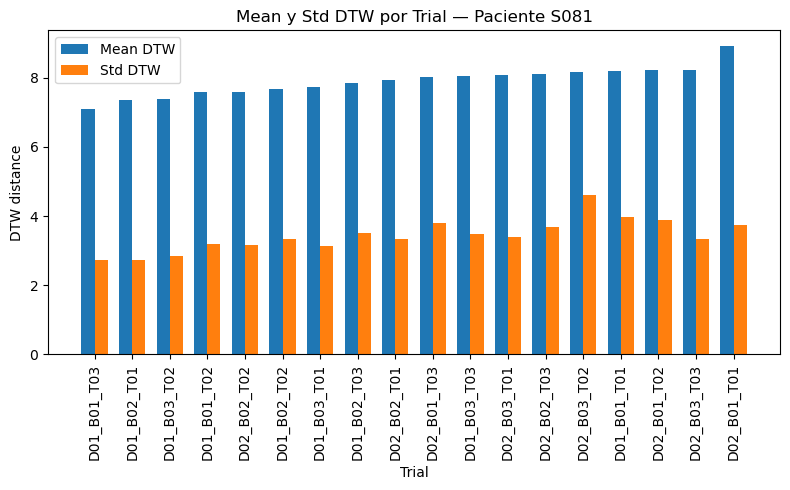

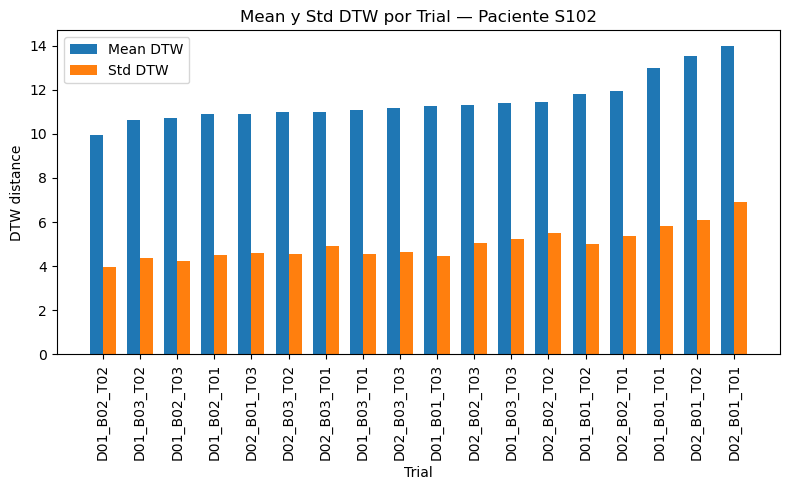

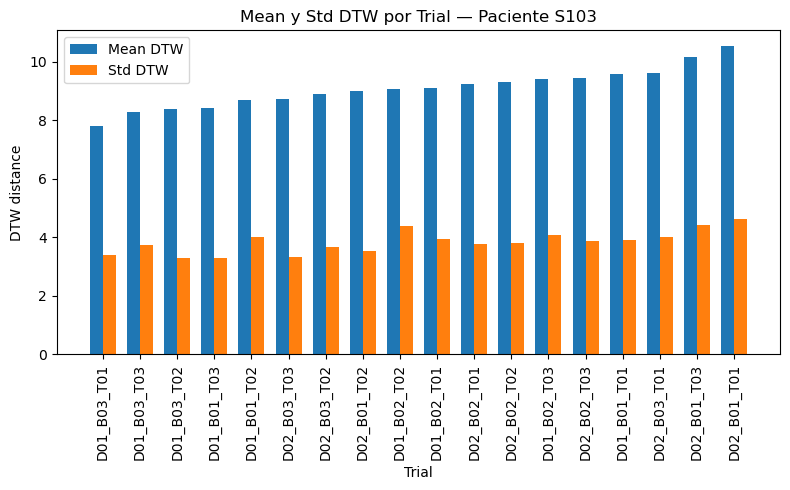

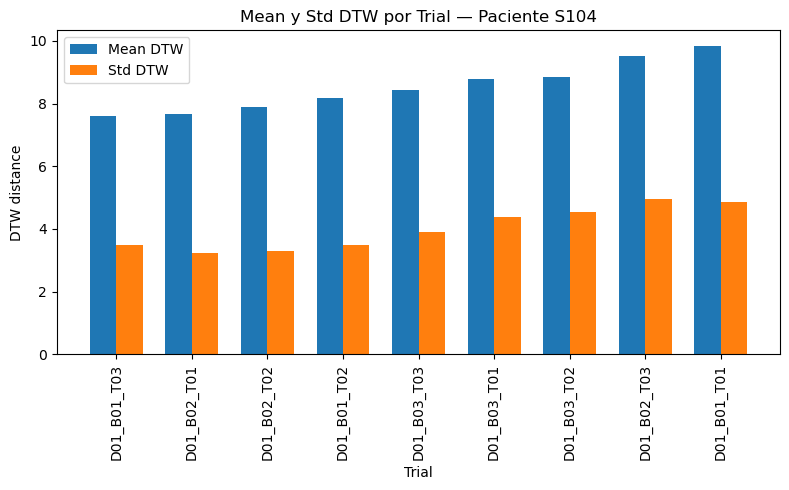

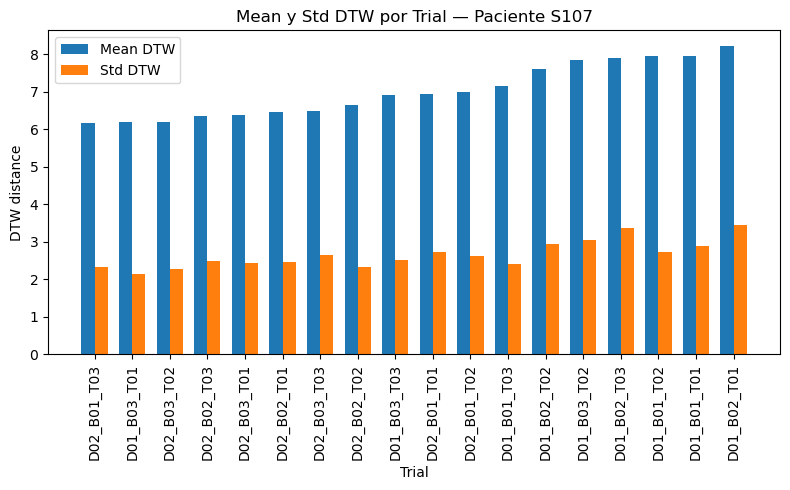

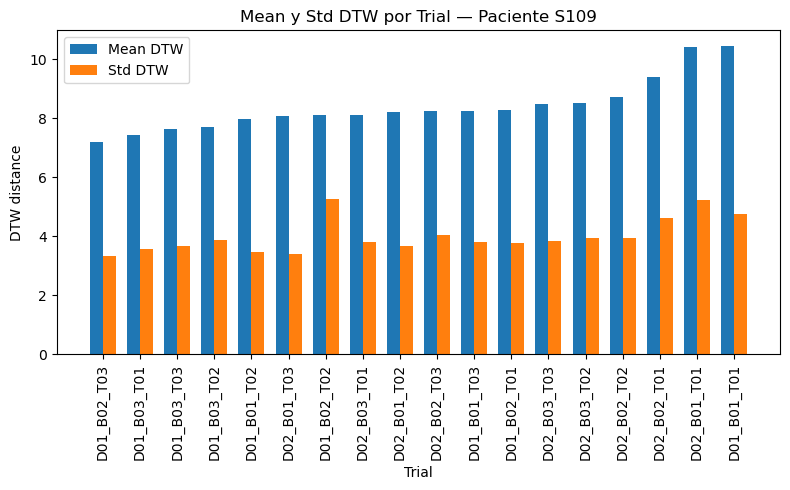

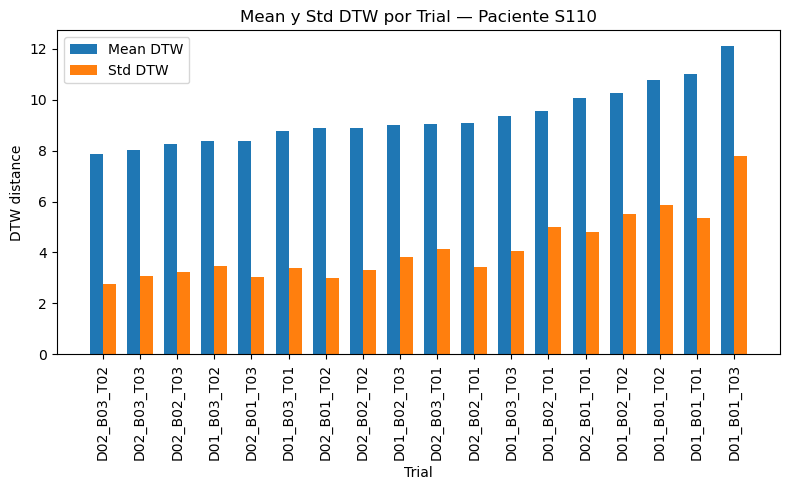

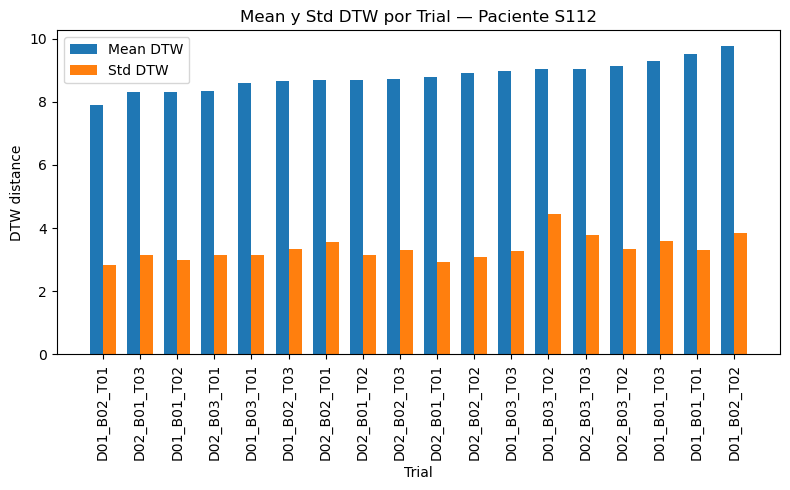

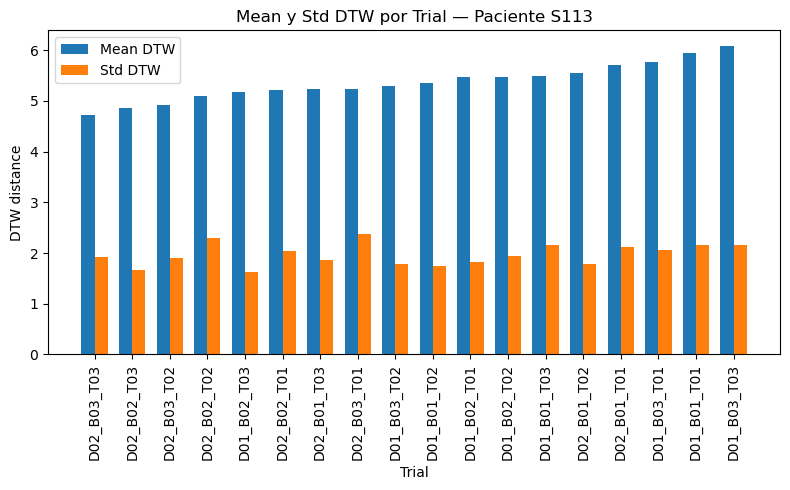

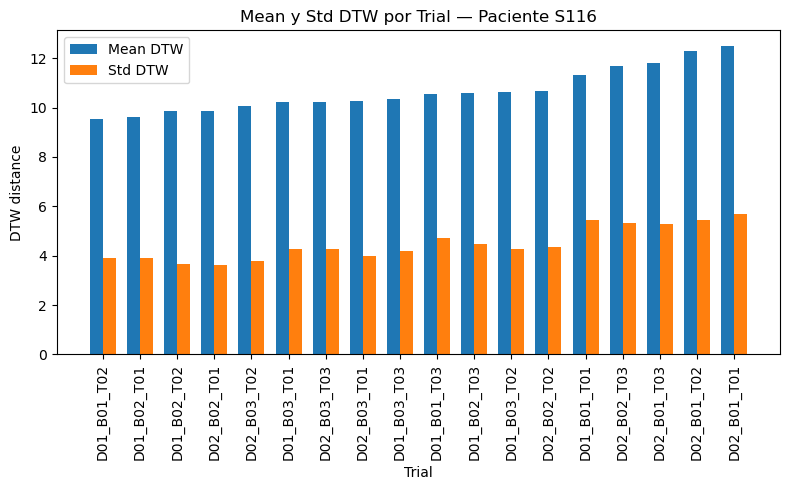

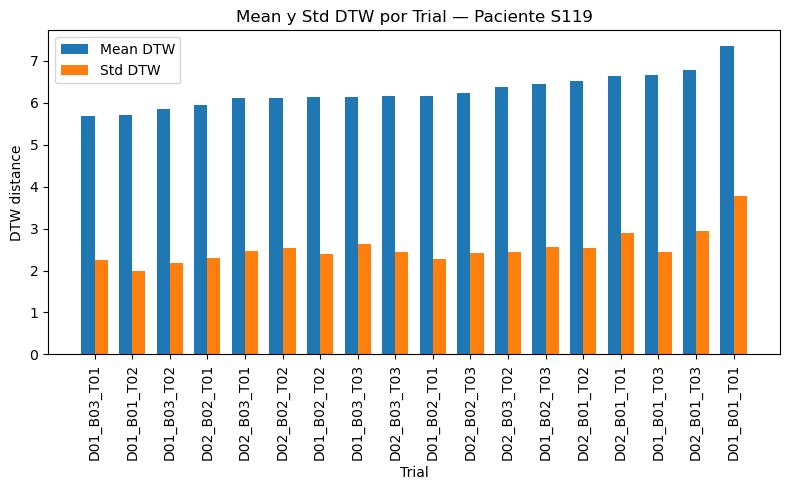

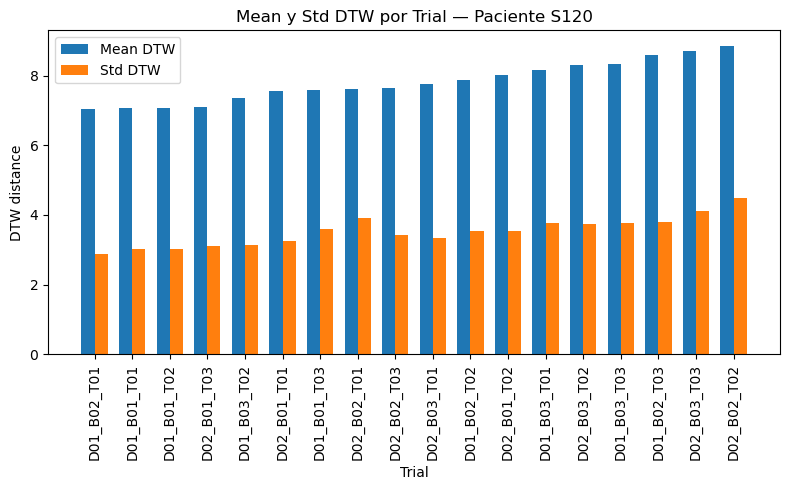

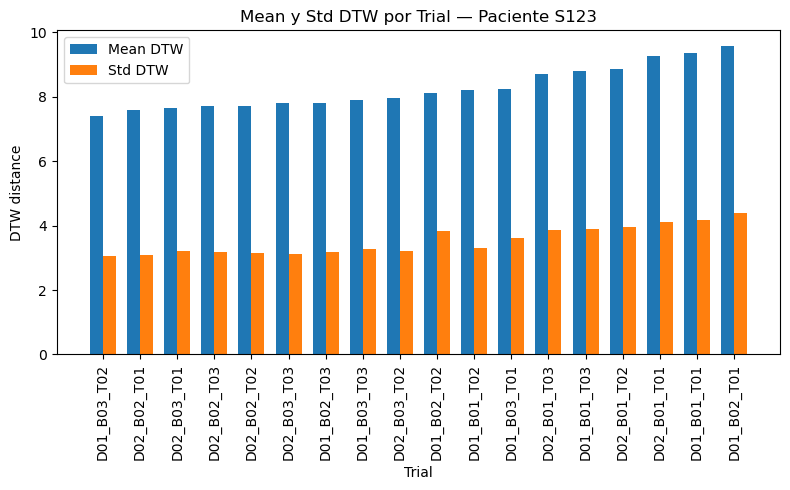

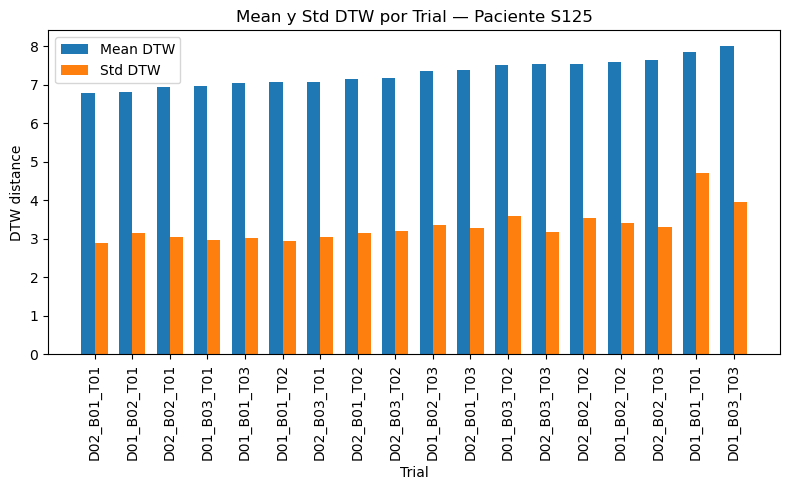

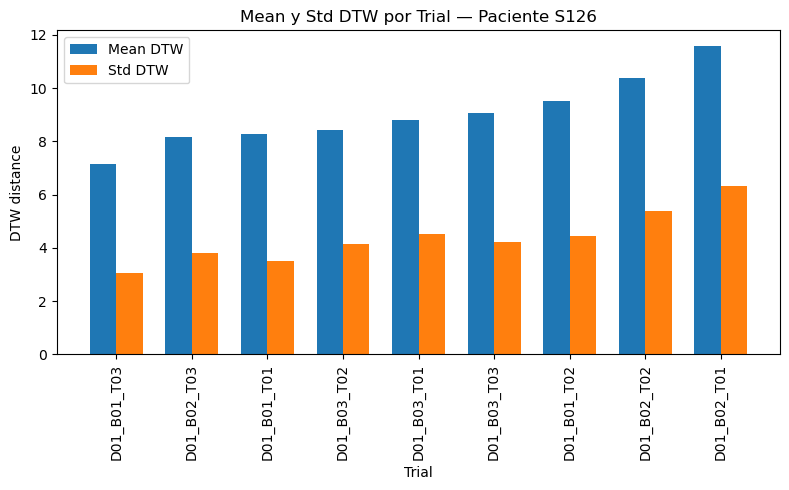

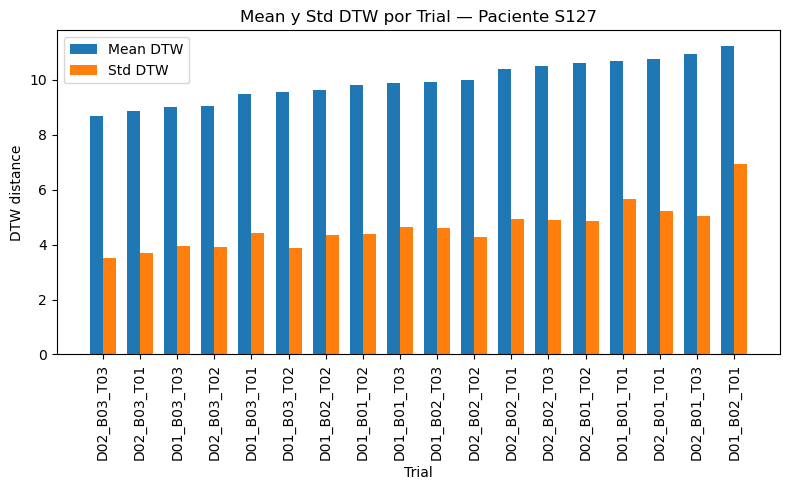

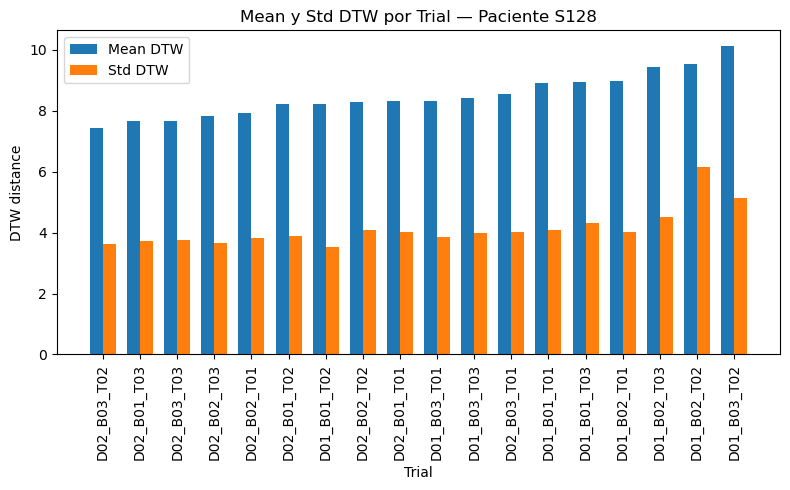

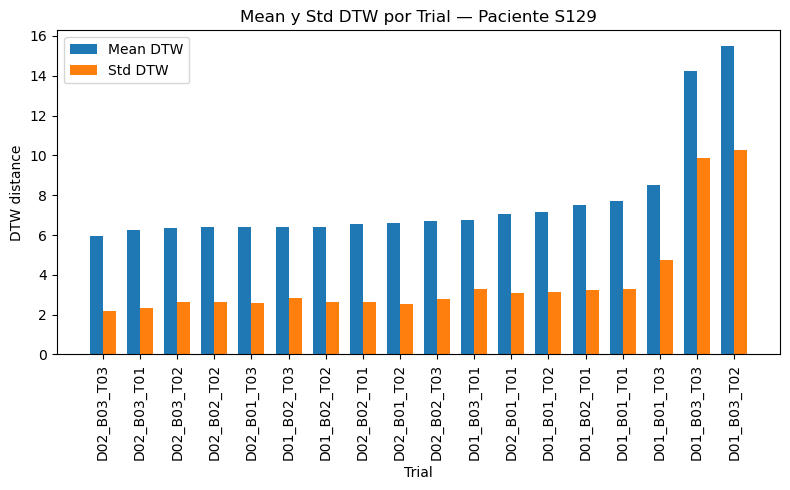

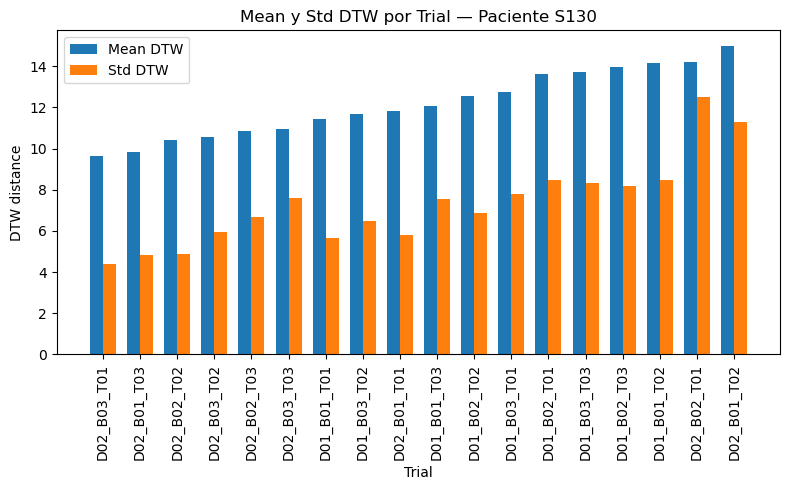

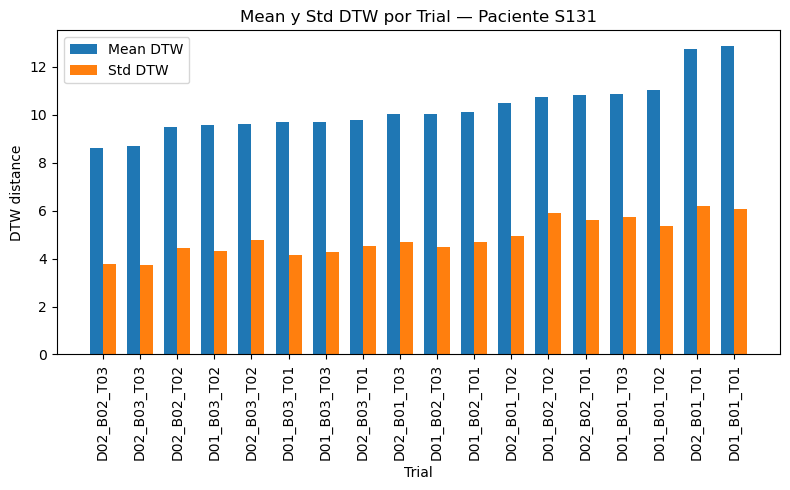

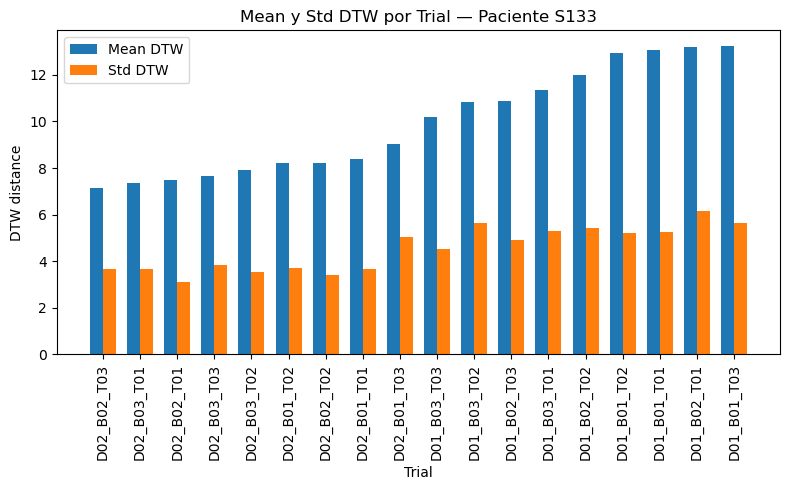

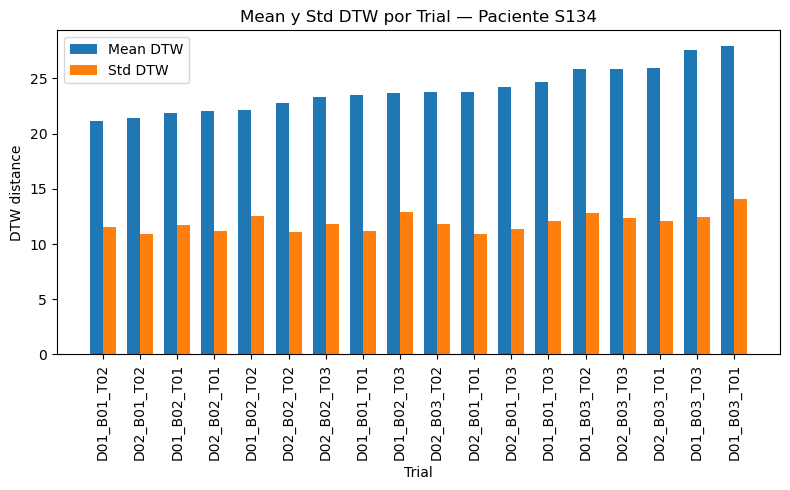

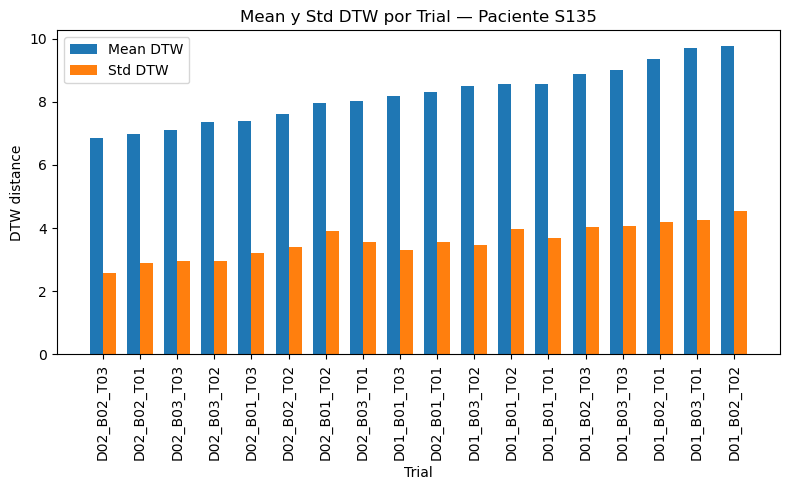

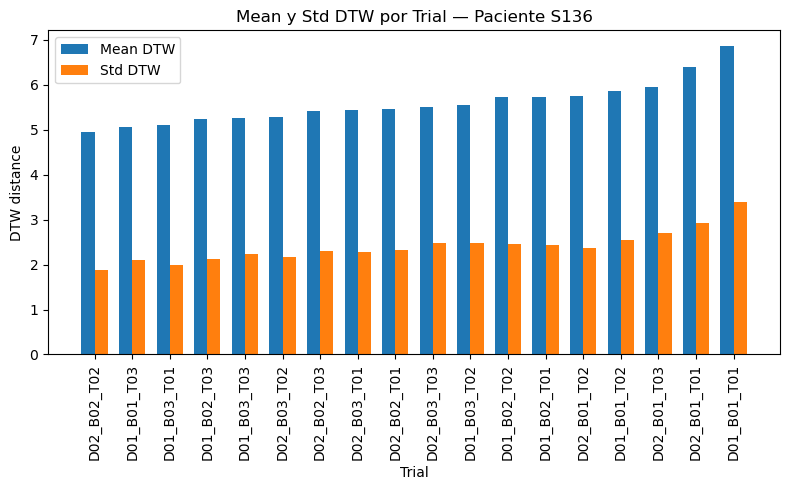

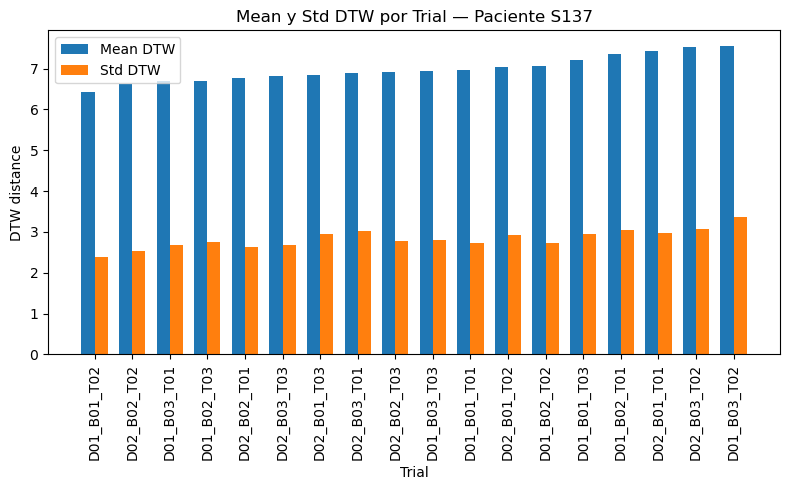

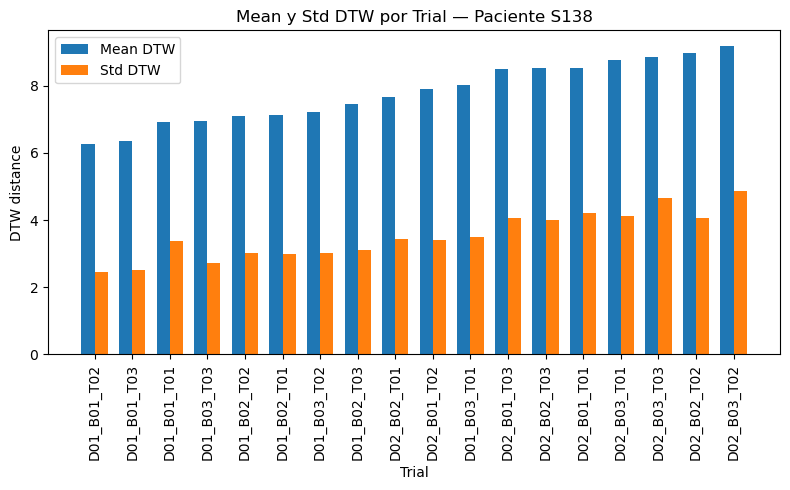

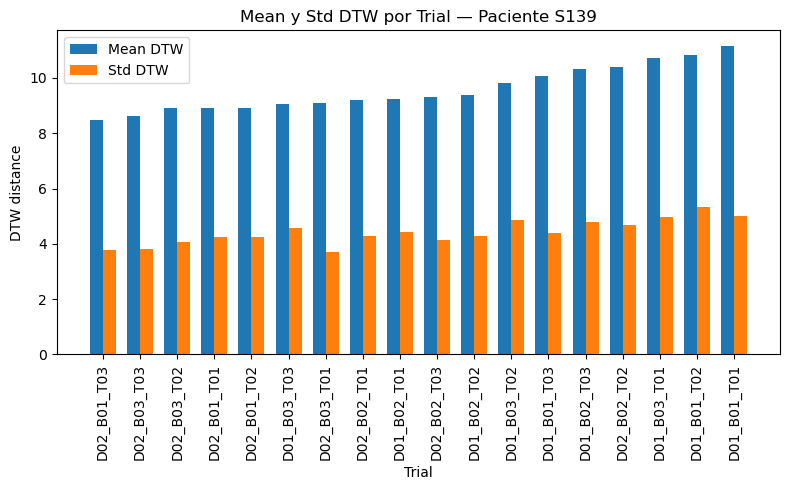

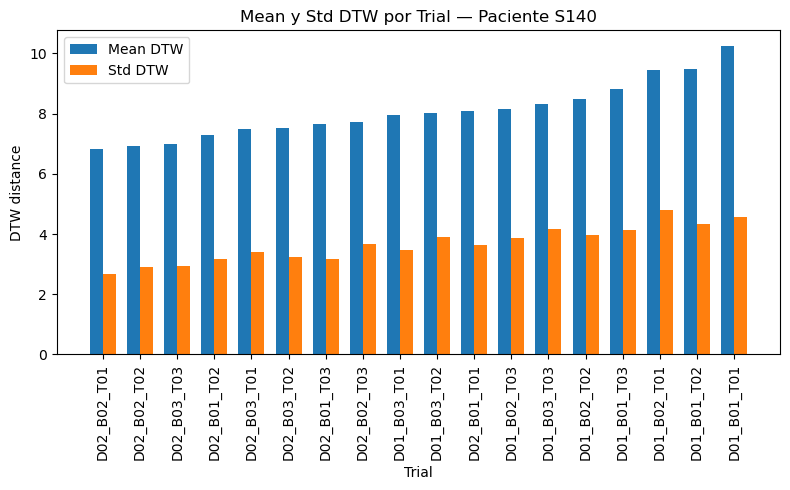

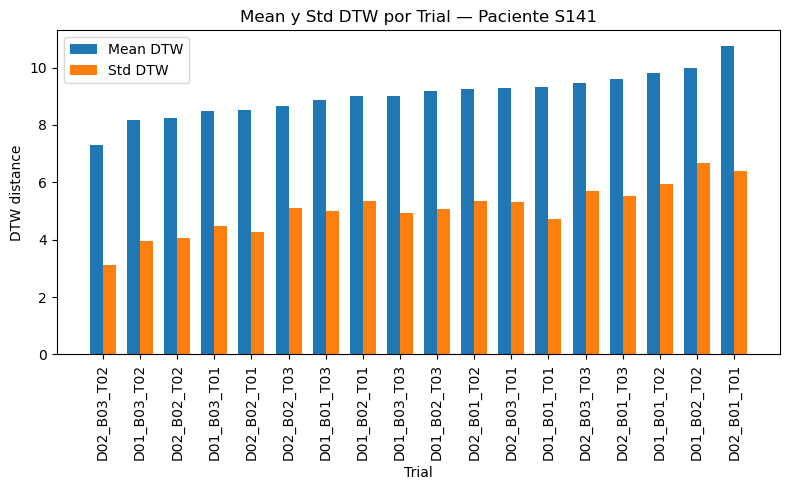

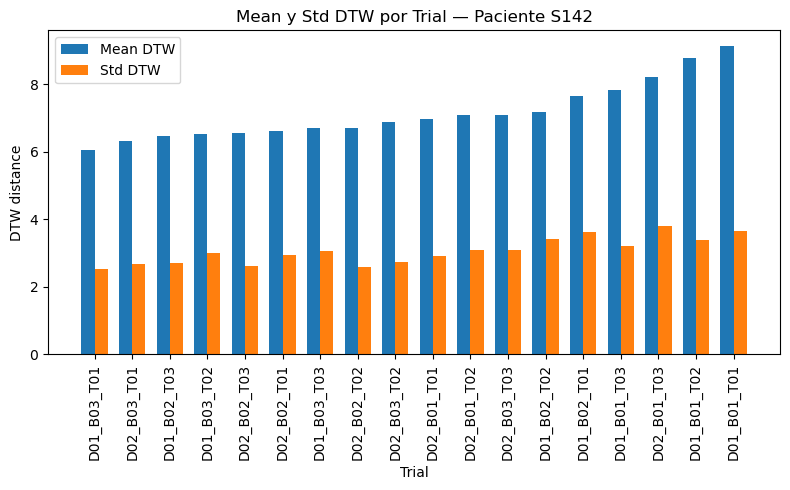

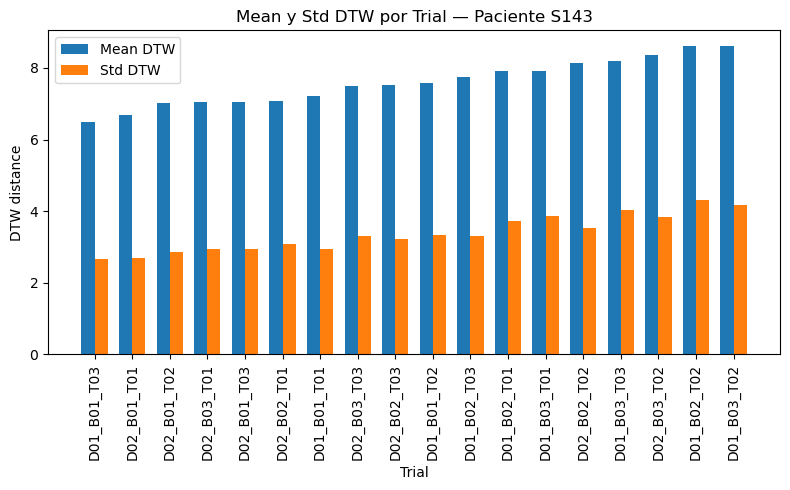

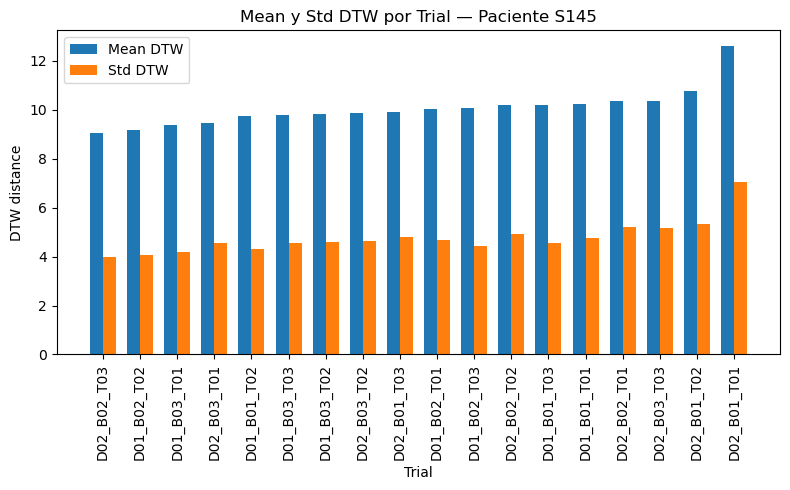

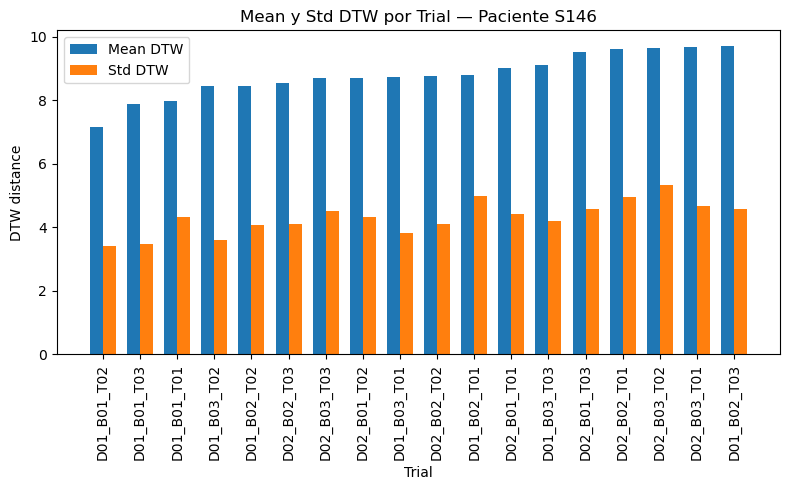

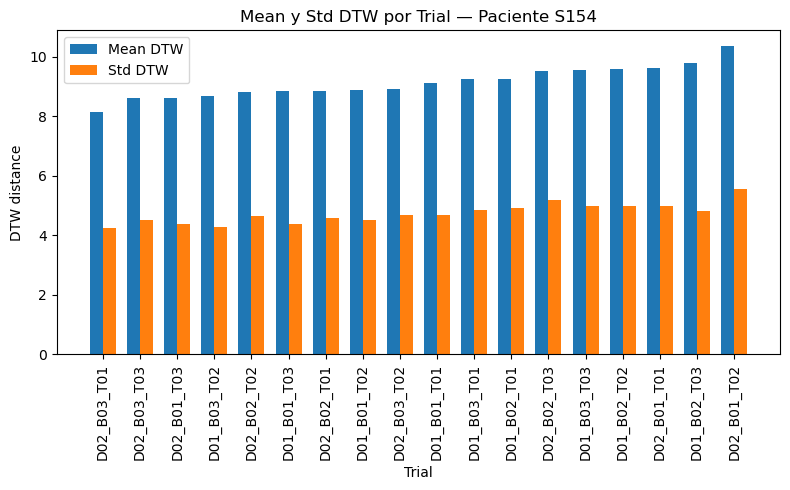

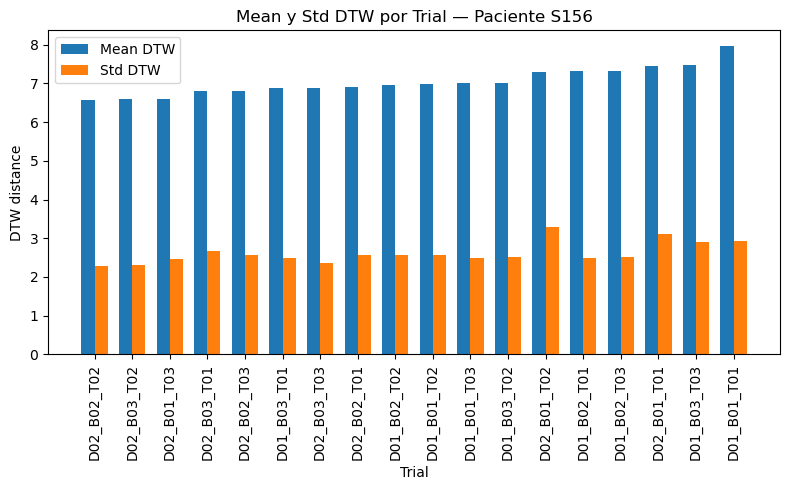

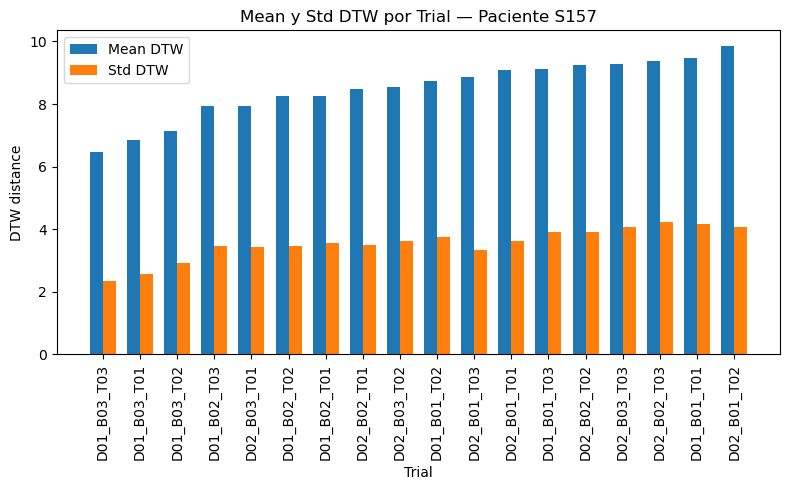

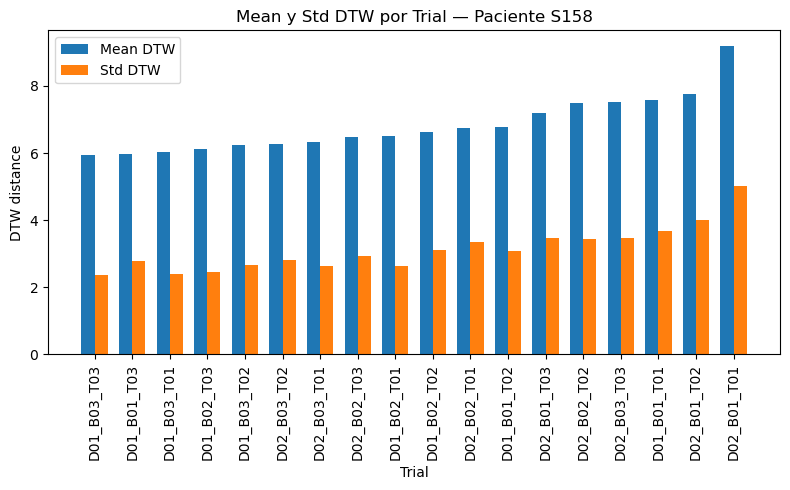

In [3]:
# Cargar archivo con columnas patient_id, trial_id, n_cycles, n_pairs, mean, median, std
df = pd.read_csv('DTW segmented/dtw_intra_trial_stats_cdist_G03.csv')  

for pid in df['patient_id'].unique():
    dfp = df[df['patient_id'] == pid].sort_values('mean')

    labels = [re.sub(r'^.*?(D.*)$', r'\1', tid) for tid in dfp['trial_id']]
    x = range(len(labels))
    width = 0.35

    plt.figure(figsize=(8,5))
    plt.bar(x, dfp['mean'], width=width, label='Mean DTW')
    plt.bar([i + width for i in x], dfp['std'], width=width, label='Std DTW')

    plt.title(f'Mean y Std DTW por Trial — Paciente {pid}')
    plt.xlabel('Trial')
    plt.ylabel('DTW distance')
    plt.xticks([i + width/2 for i in x], labels, rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [4]:
# Define Threshold
df_stats = pd.read_csv(csv_path)
mean_threshold = df_stats['mean'].quantile(0.95)
std_threshold  = df_stats['std'].quantile(0.95)

print(f"Mean DTW threshold: {mean_threshold:.2f}")
print(f"Std  DTW threshold: {std_threshold:.2f}")

# Añadir columna booleana de exclusión
df_stats['exclude'] = (df_stats['mean'] > mean_threshold) | (df_stats['std'] > std_threshold)

Mean DTW threshold: 16.71
Std  DTW threshold: 11.00


In [5]:
# Identify Outliers
erratic_trials = df_stats[df_stats['exclude']]
print("Erratic trials detected:")
display(erratic_trials[['patient_id', 'trial_id', 'mean', 'std']])
# Exclude patients with >50% bad trials
erratic_rate = df_stats.groupby('patient_id')['exclude'].mean()
erratic_patients = erratic_rate[erratic_rate > 0.5].index.tolist()
print(f"Erratic patients (>50% bad trials): {erratic_patients}")

Erratic trials detected:


,patient_id,trial_id,mean,std
37,S003,S003_G01_D01_B01_T02,17.702487,11.780131
38,S003,S003_G01_D01_B01_T03,16.859174,11.204399
39,S003,S003_G01_D01_B02_T01,17.507238,11.129203
40,S003,S003_G01_D01_B02_T02,19.171613,14.073255
42,S003,S003_G01_D01_B03_T01,17.144707,10.926771
44,S003,S003_G01_D01_B03_T03,20.758127,11.200759
48,S003,S003_G01_D02_B02_T01,18.885223,13.208228
71,S004,S004_G01_D02_B03_T03,10.472133,12.819621
75,S005,S005_G01_D01_B02_T01,15.387525,14.574459
78,S005,S005_G01_D01_B03_T01,17.717871,13.166034


Erratic patients (>50% bad trials): []


In [14]:
#Save cleaned data 
clean_df_stats = df_stats[~df_stats['exclude']].copy()
clean_df_stats = clean_df_stats[~clean_df_stats['patient_id'].isin(erratic_patients)]
clean_df_stats.to_csv('DTW/cleaned_trials.csv', index=False)

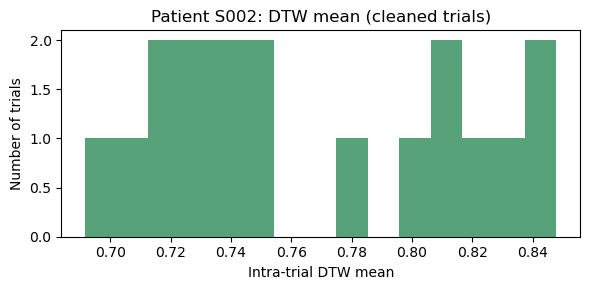

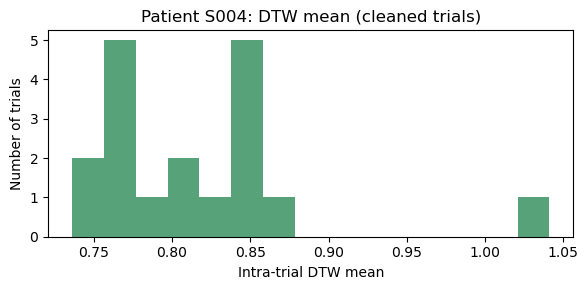

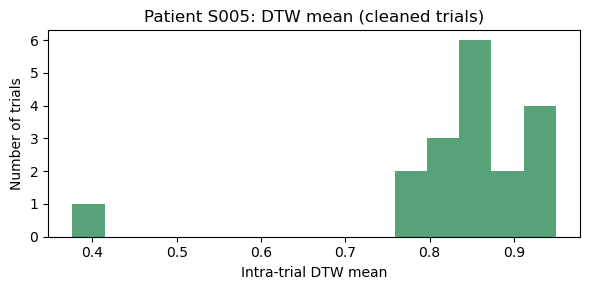

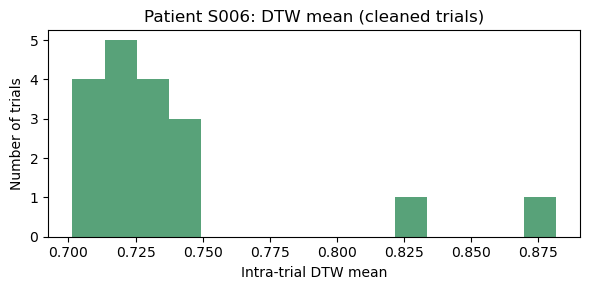

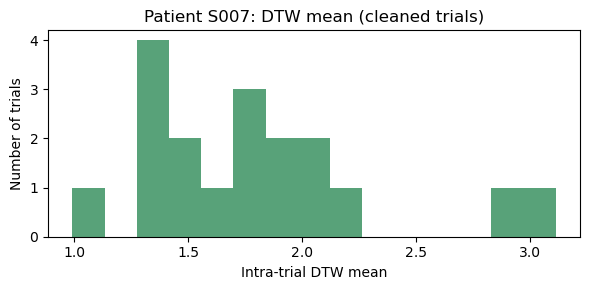

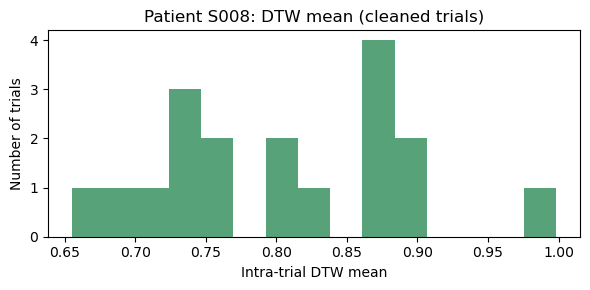

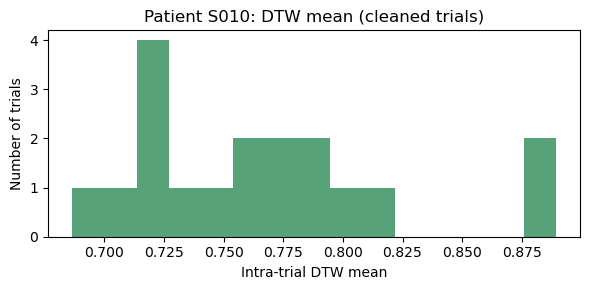

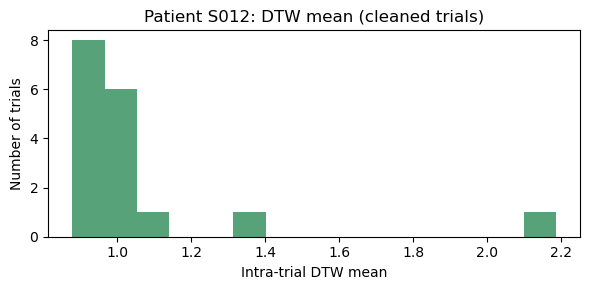

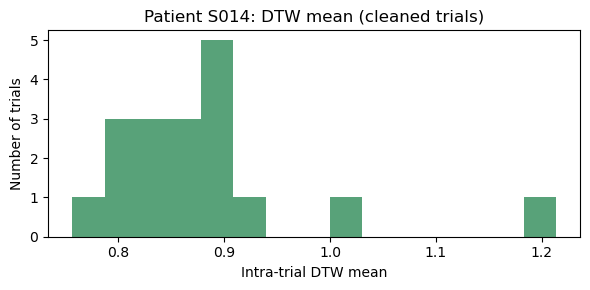

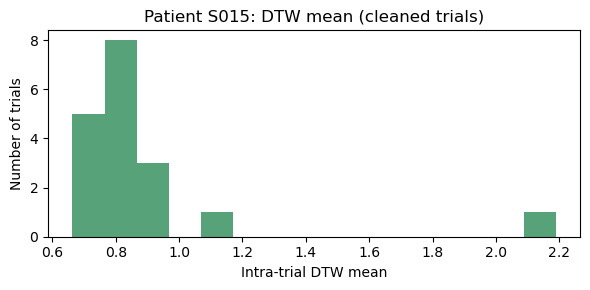

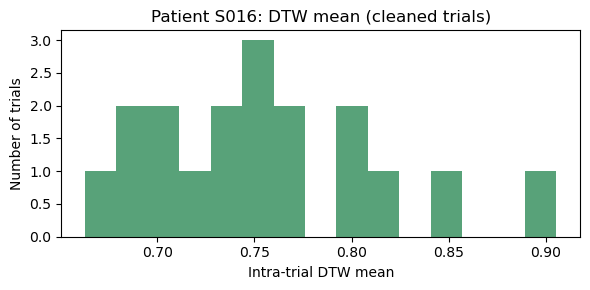

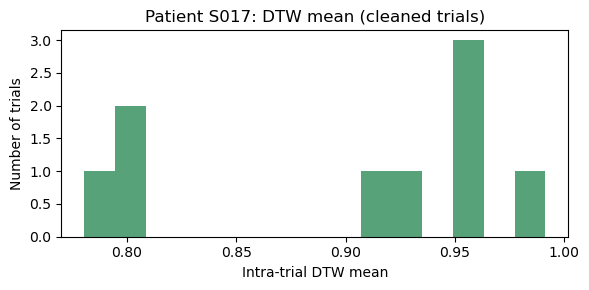

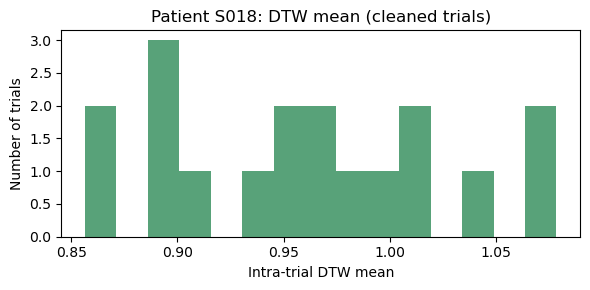

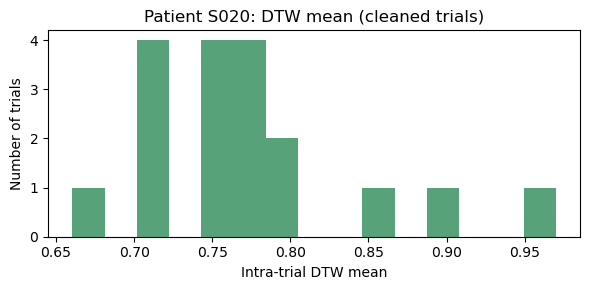

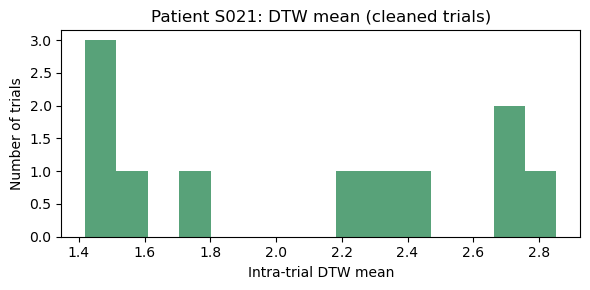

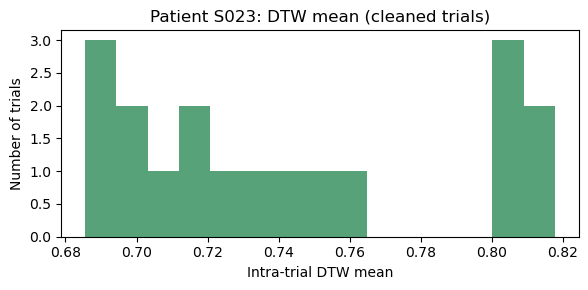

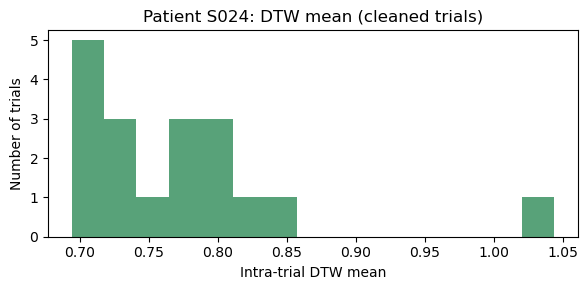

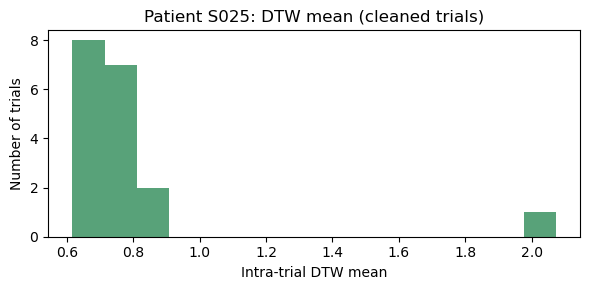

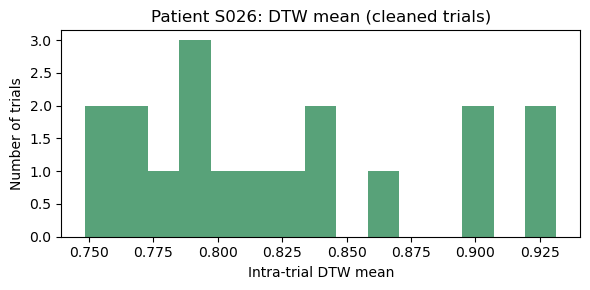

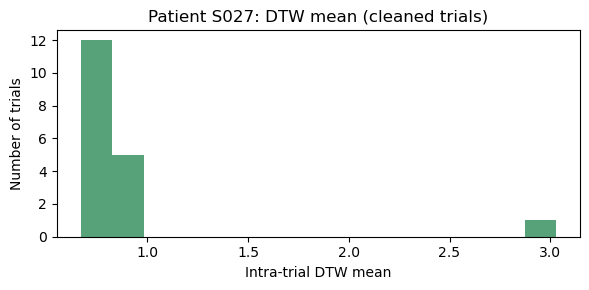

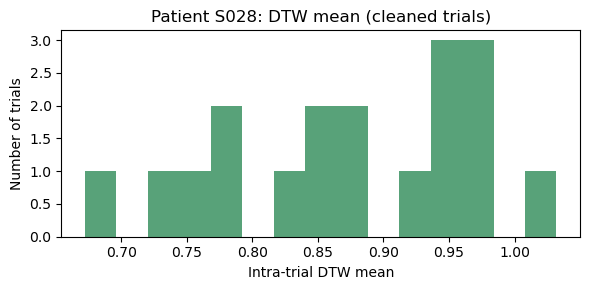

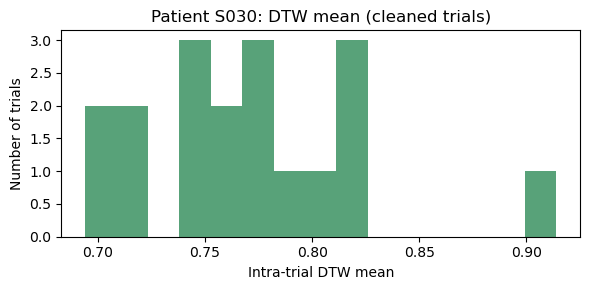

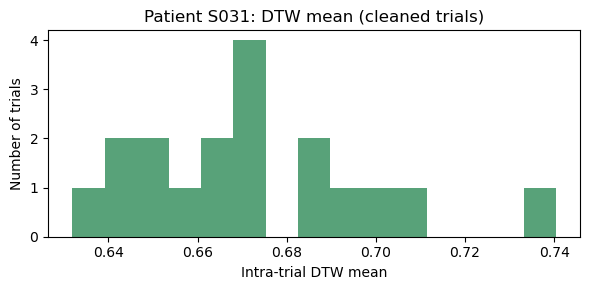

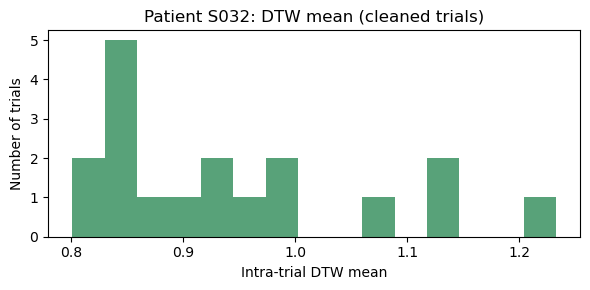

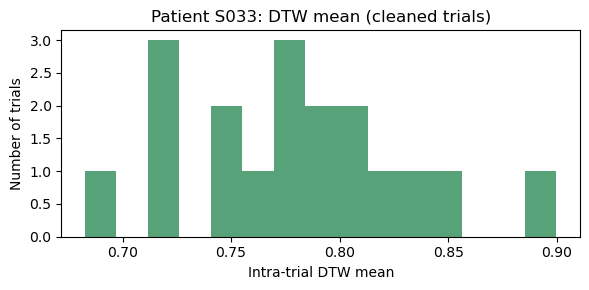

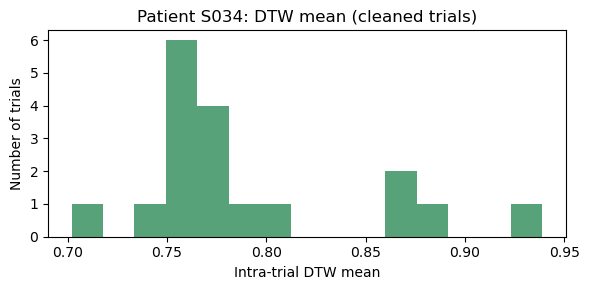

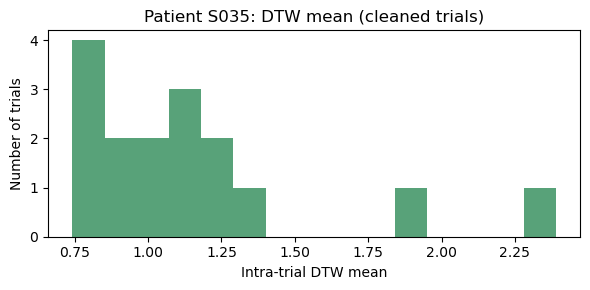

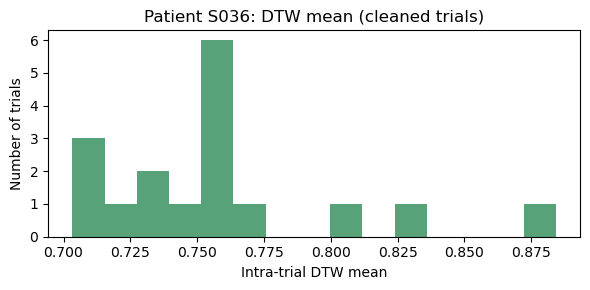

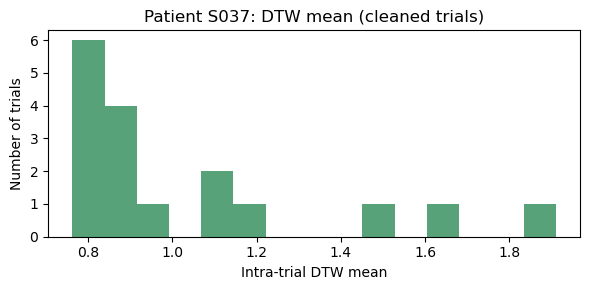

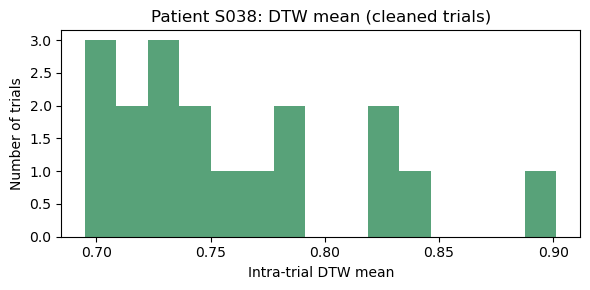

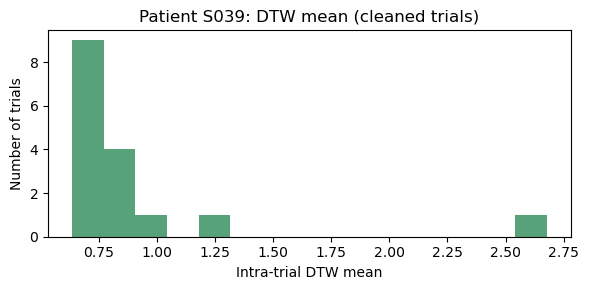

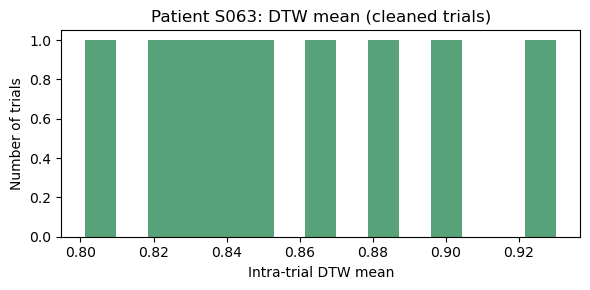

In [ ]:
#DTW Histogram per patient after cleaning 
df = pd.read_csv('DTW/cleaned_trials.csv')

for pid, group in df.groupby('patient_id'):
    plt.figure(figsize=(6, 3))
    plt.hist(group['mean'].dropna(), bins=15, color='seagreen', alpha=0.8)
    plt.title(f'Patient {pid}: DTW mean (cleaned trials)')
    plt.xlabel('Intra-trial DTW mean')
    plt.ylabel('Number of trials')
    plt.tight_layout()
    plt.show()


In [ ]:
# Compare before and after cleaning 
#Allows to visualize the effect of cleaning on the DTW mean values
df_all = pd.read_csv('DTW/dtw_intra_trial_stats.csv')
df_clean = pd.read_csv('DTW/cleaned_trials.csv')

erratic_patients = df_all[df_all['exclude']]['patient_id'].unique()

for pid in erratic_patients:
    plt.figure(figsize=(8, 4))
    before = df_all[df_all['patient_id'] == pid]['mean'].dropna()
    after  = df_clean[df_clean['patient_id'] == pid]['mean'].dropna()
    plt.hist(before, bins=15, alpha=0.6, label='Before cleaning', color='salmon')
    plt.hist(after,  bins=15, alpha=0.7, label='After cleaning', color='seagreen')
    plt.title(f'Patient {pid}: DTW mean (before vs after cleaning)')
    plt.xlabel('Intra-trial DTW mean')
    plt.ylabel('Number of trials')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# Compare between model patient and erratic patients 
df_clean = pd.read_csv('DTW/cleaned_trials.csv')
df_all = pd.read_csv('DTW/dtw_intra_trial_stats.csv')

# Model patient (with the lowest median DTW mean)
median_per_patient = df_clean.groupby('patient_id')['mean'].median()
modelo_pid = median_per_patient.idxmin()
modelo_means = df_clean[df_clean['patient_id'] == modelo_pid]['mean'].dropna()


erratic_patients = df_all[df_all['exclude']]['patient_id'].unique()

for pid in erratic_patients:
    plt.figure(figsize=(8, 4))
    patient_means = df_all[df_all['patient_id'] == pid]['mean'].dropna()
    plt.hist(modelo_means, bins=15, alpha=0.7, label=f'Patient Modelo: {modelo_pid}', color='royalblue')
    plt.hist(patient_means, bins=15, alpha=0.7, label=f'Erratic patient: {pid}', color='darkorange')
    plt.title(f'Comparison: Modelo vs Erratic Patient {pid}')
    plt.xlabel('Intra-trial DTW mean')
    plt.ylabel('Number of trials')
    plt.legend()
    plt.tight_layout()
    plt.show()

## Analysis for the Raw signal without segmentation 

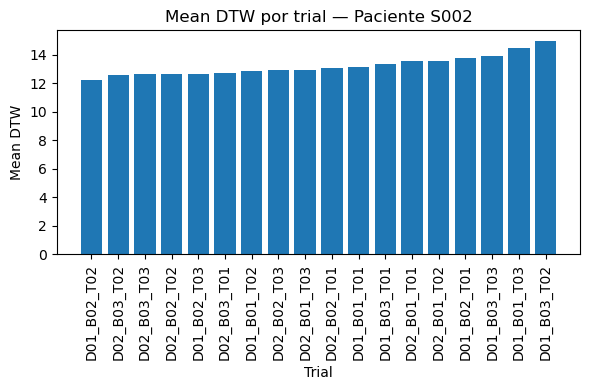

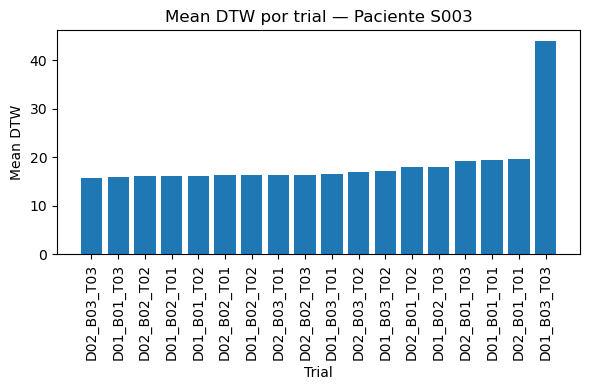

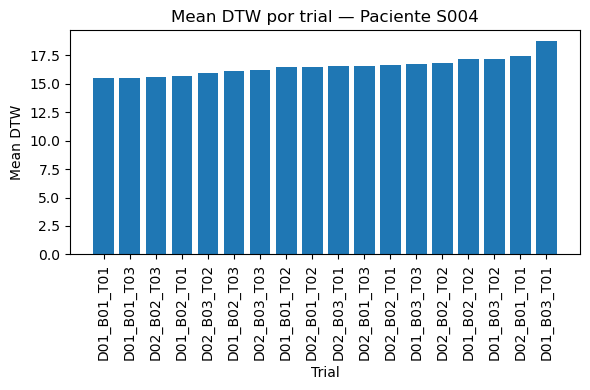

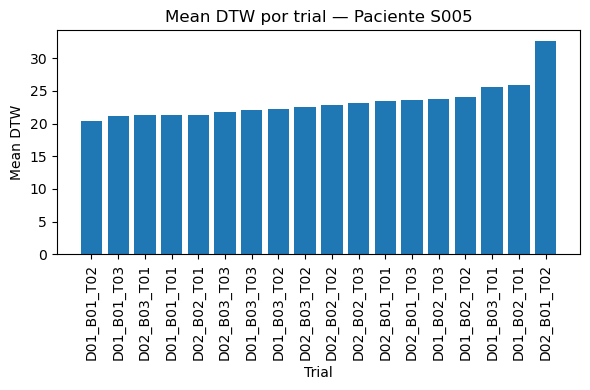

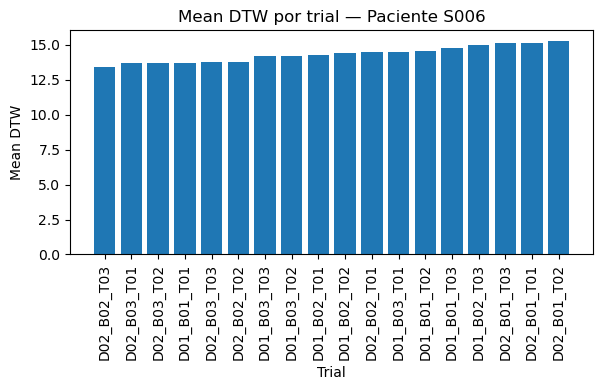

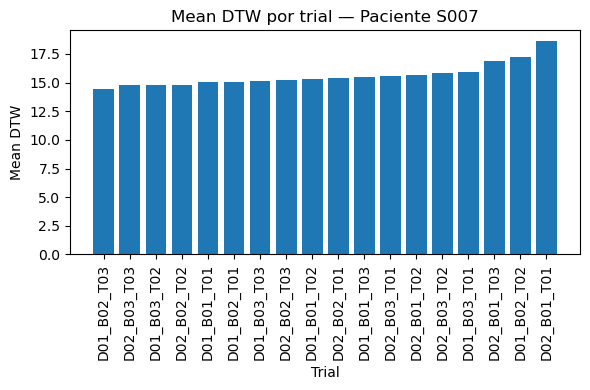

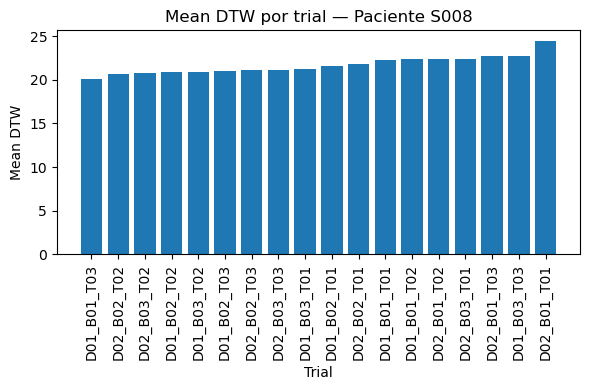

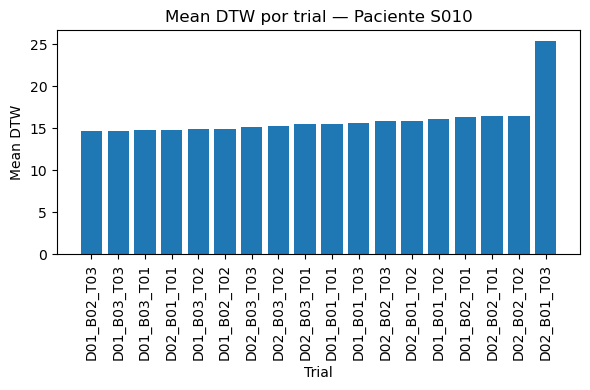

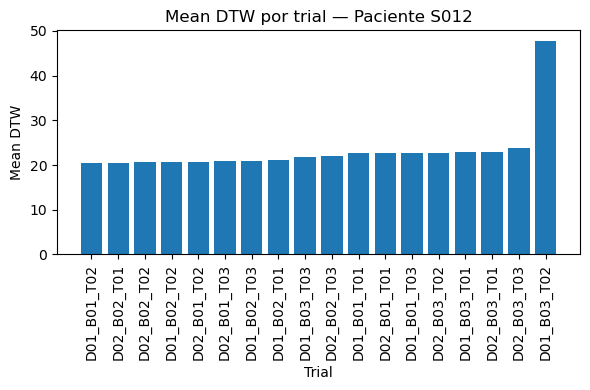

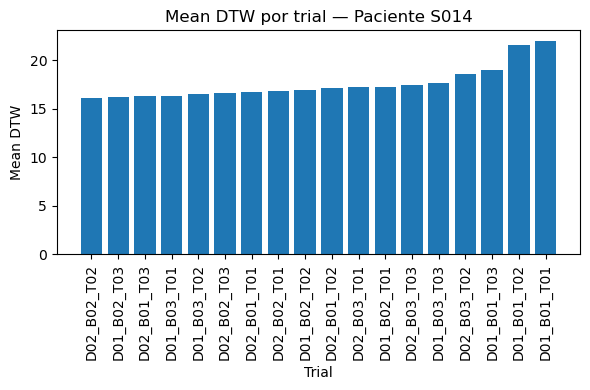

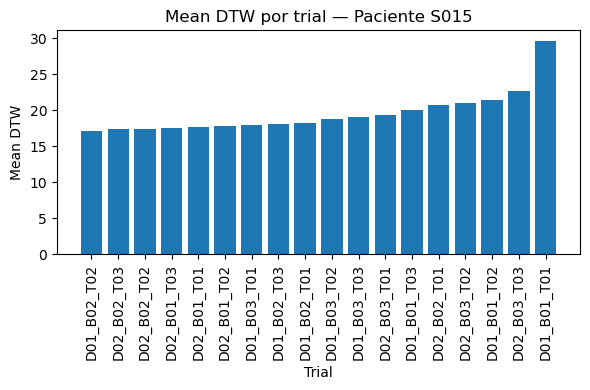

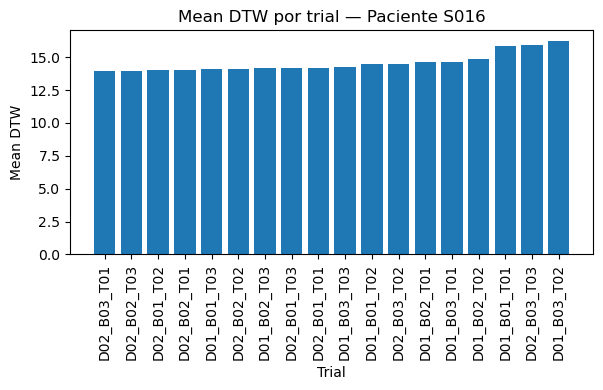

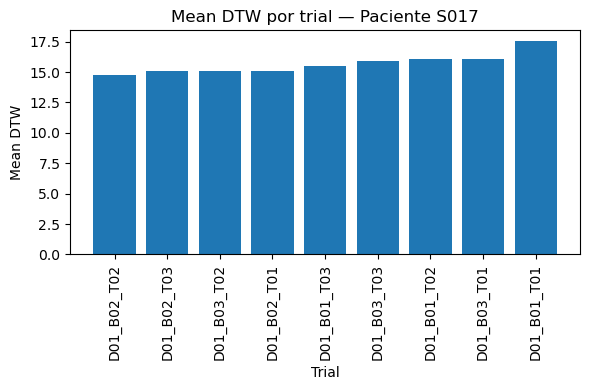

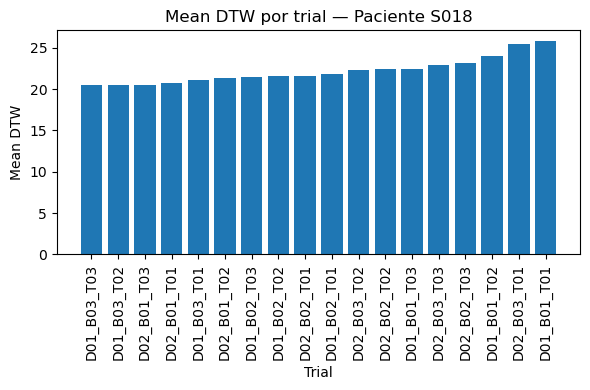

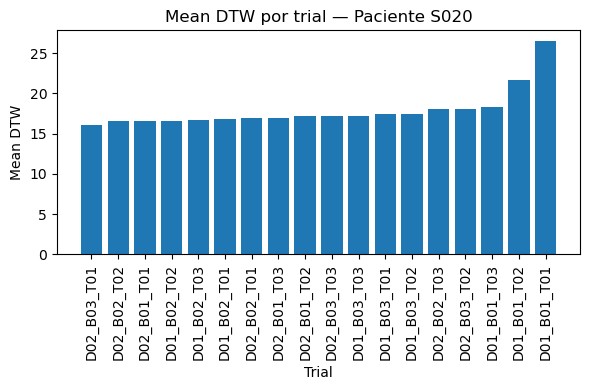

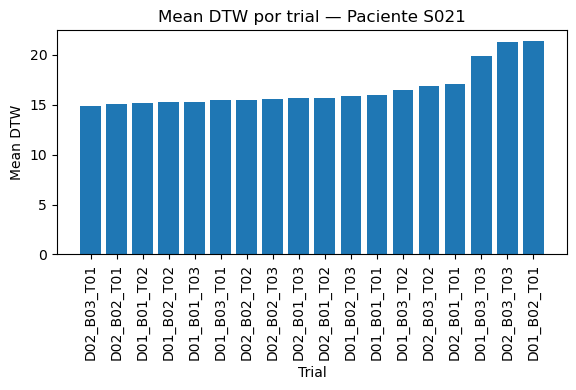

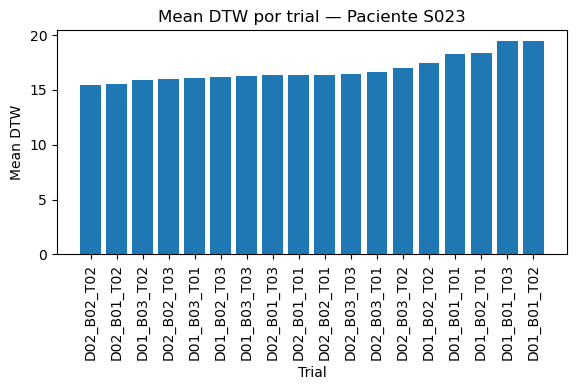

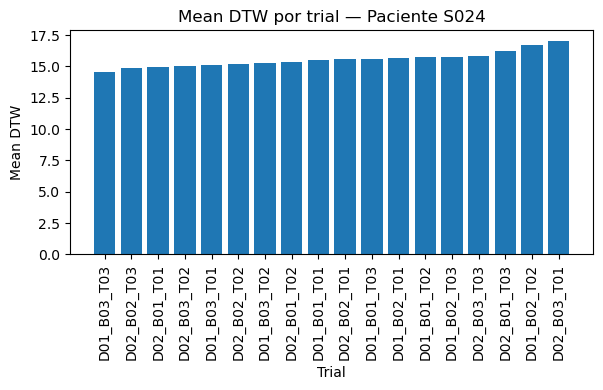

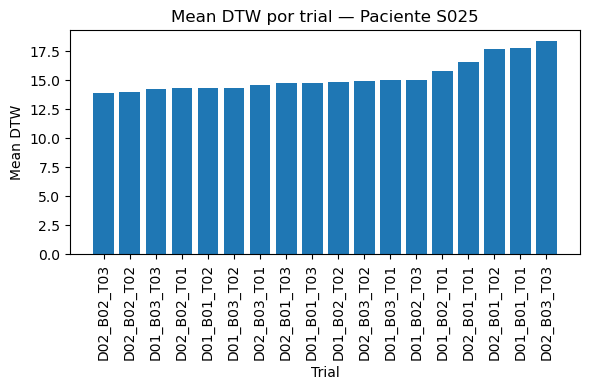

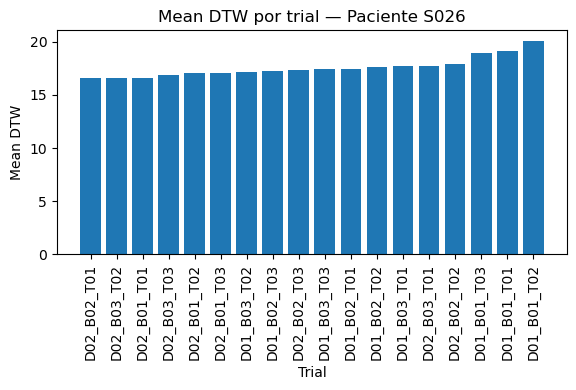

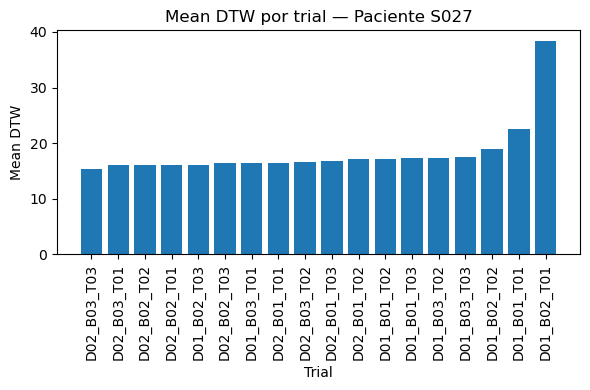

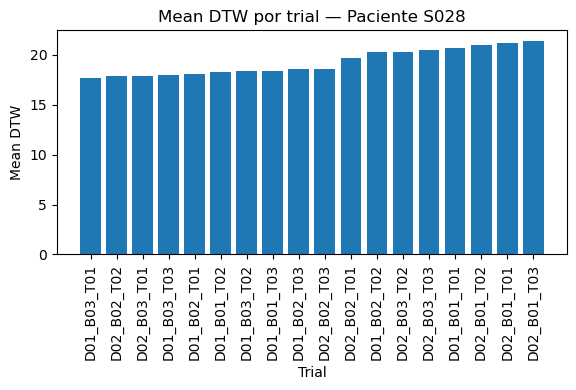

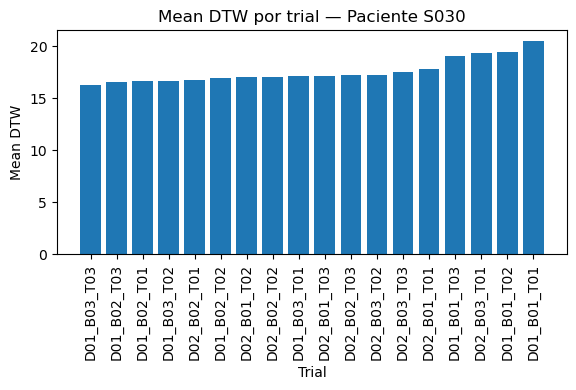

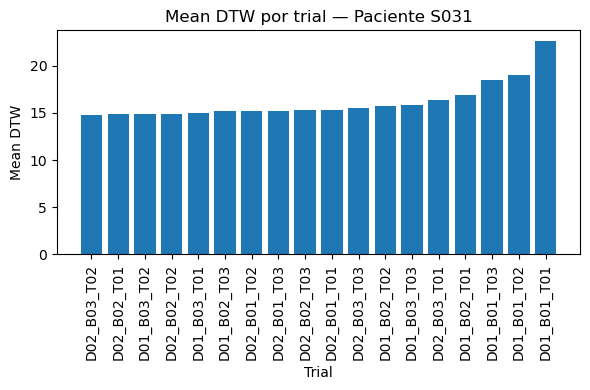

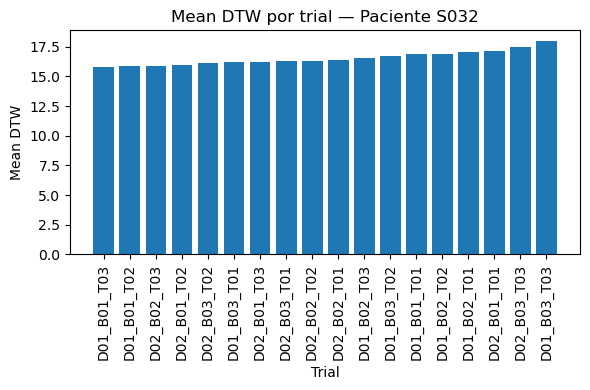

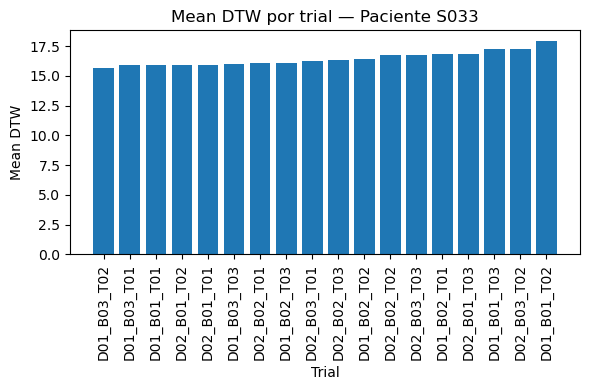

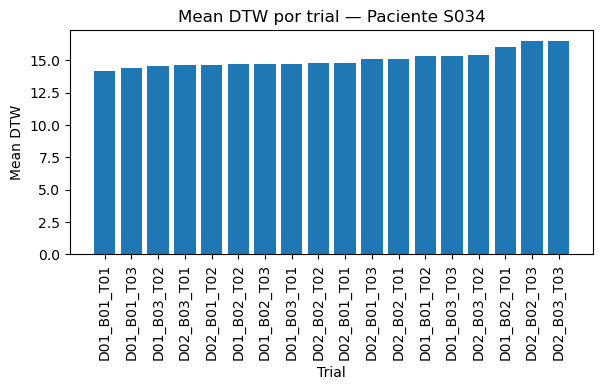

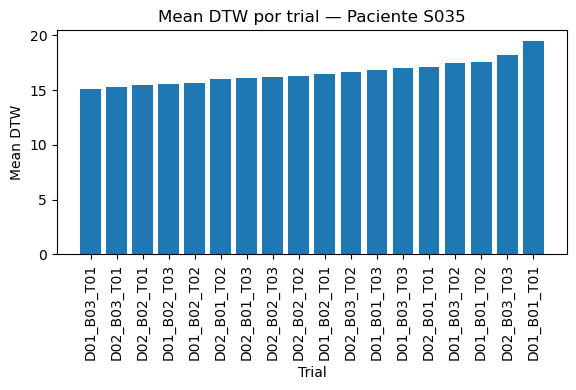

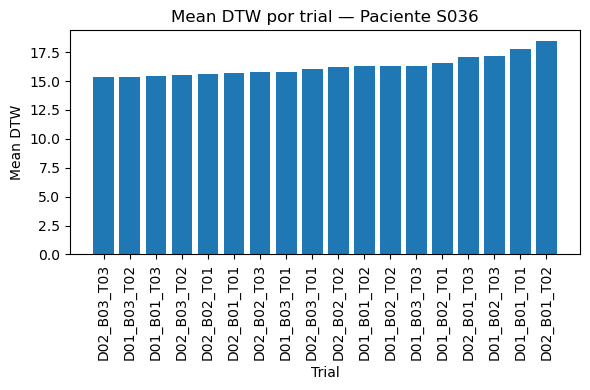

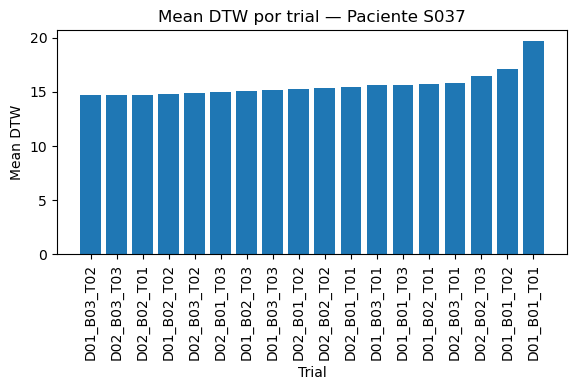

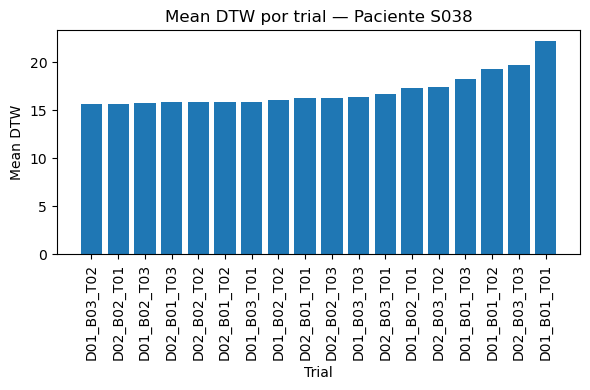

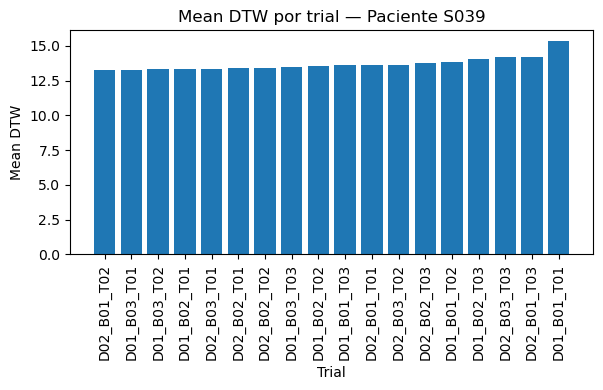

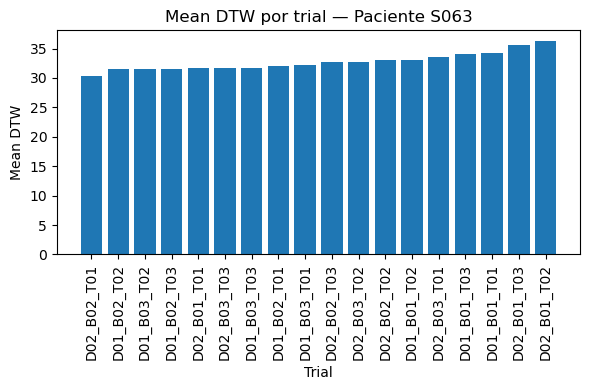

<Figure size 600x400 with 0 Axes>

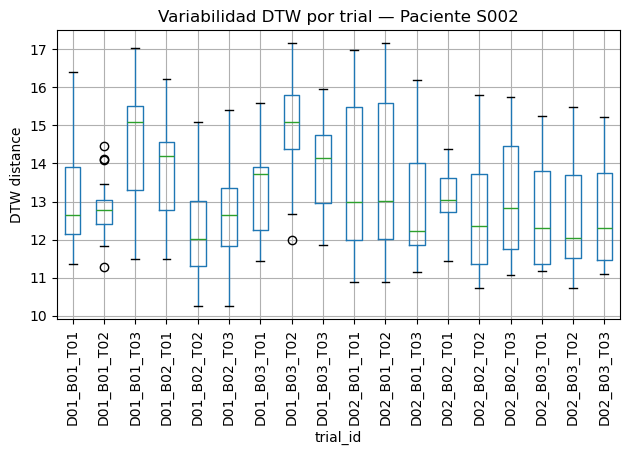

<Figure size 600x400 with 0 Axes>

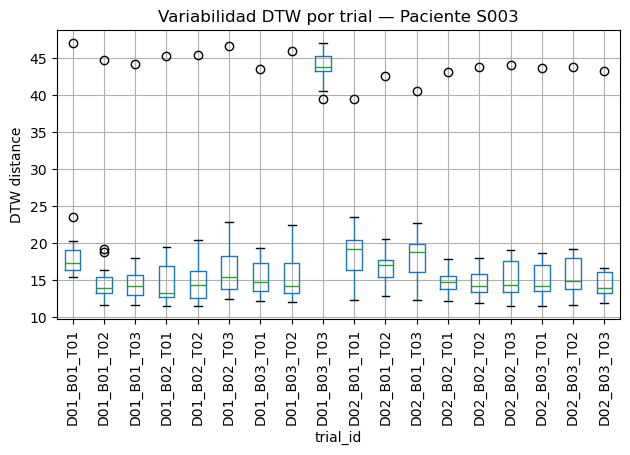

<Figure size 600x400 with 0 Axes>

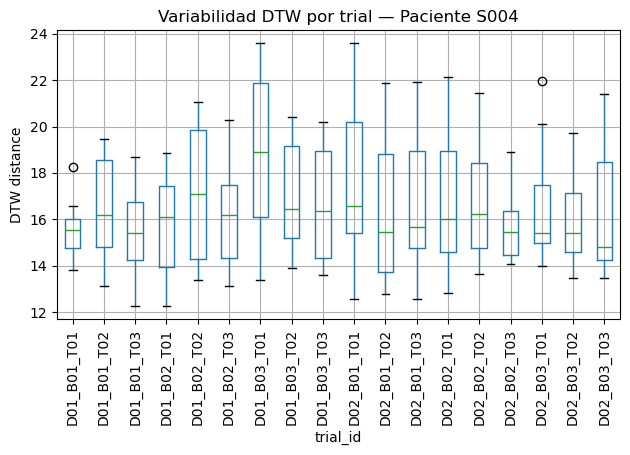

<Figure size 600x400 with 0 Axes>

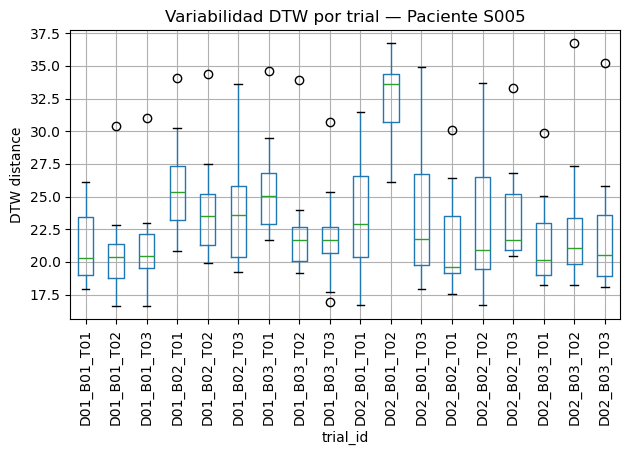

<Figure size 600x400 with 0 Axes>

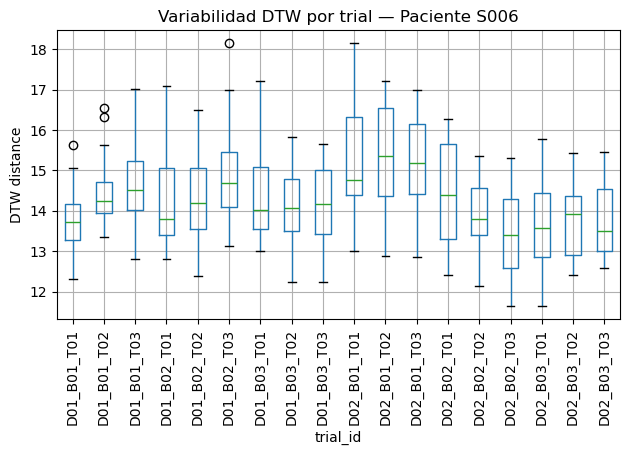

<Figure size 600x400 with 0 Axes>

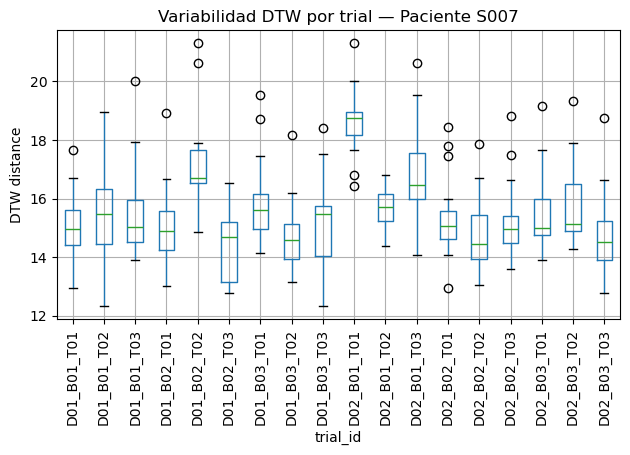

<Figure size 600x400 with 0 Axes>

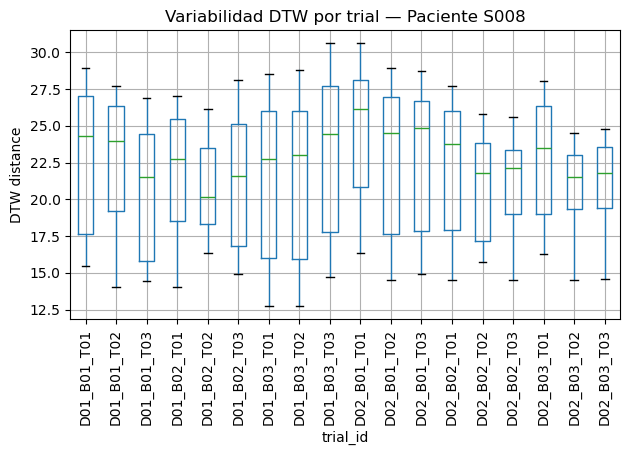

<Figure size 600x400 with 0 Axes>

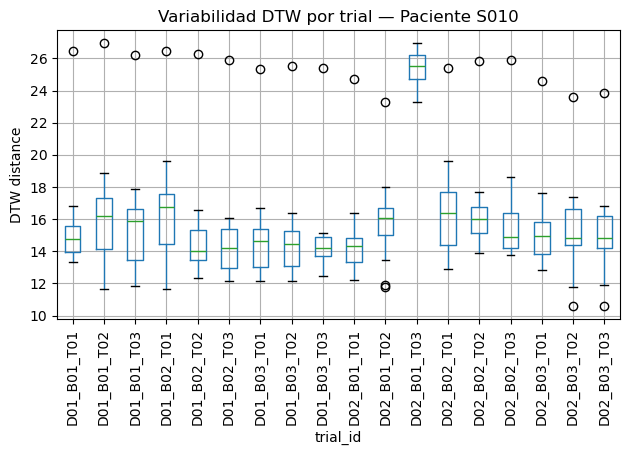

<Figure size 600x400 with 0 Axes>

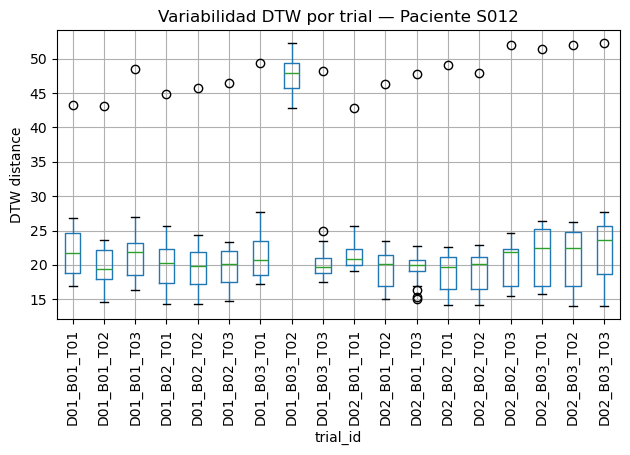

<Figure size 600x400 with 0 Axes>

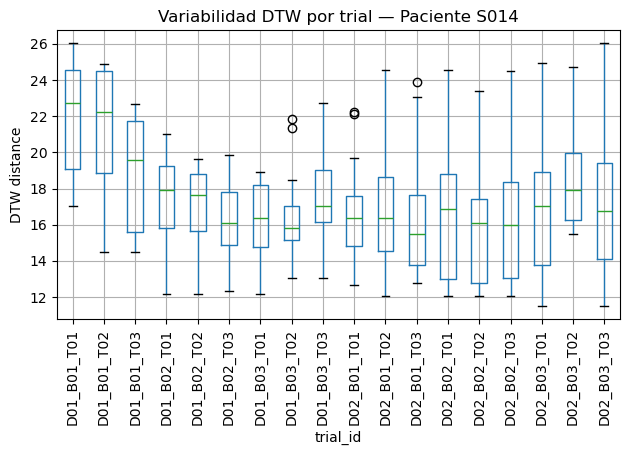

<Figure size 600x400 with 0 Axes>

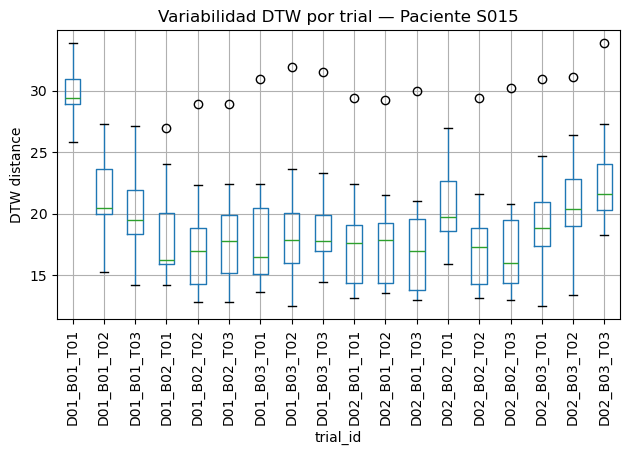

<Figure size 600x400 with 0 Axes>

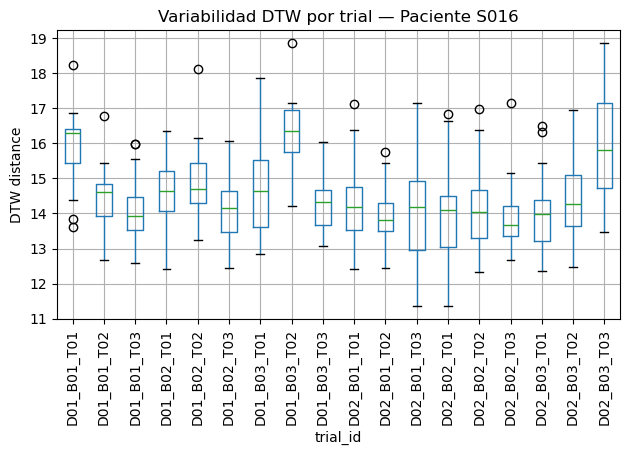

<Figure size 600x400 with 0 Axes>

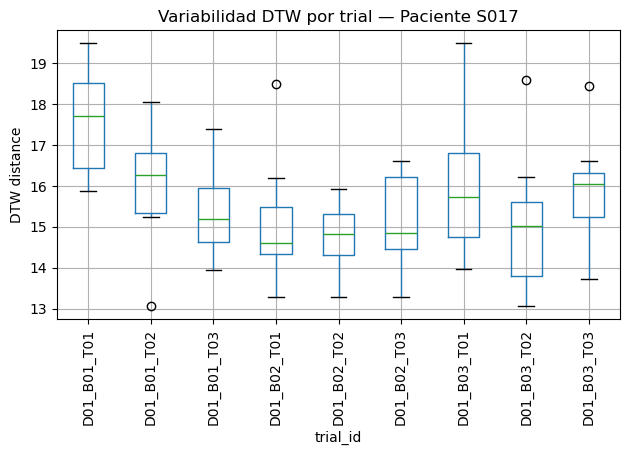

<Figure size 600x400 with 0 Axes>

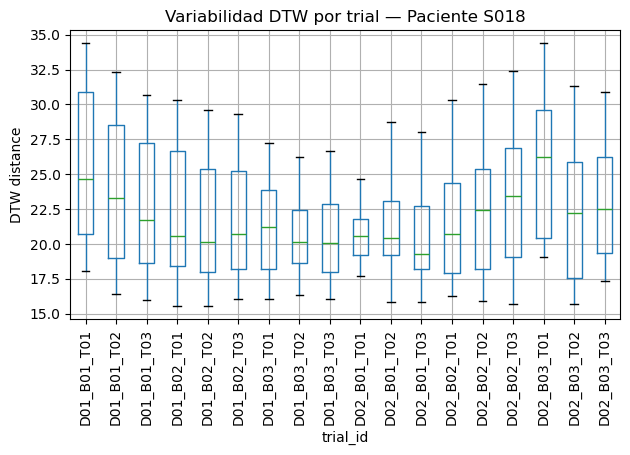

<Figure size 600x400 with 0 Axes>

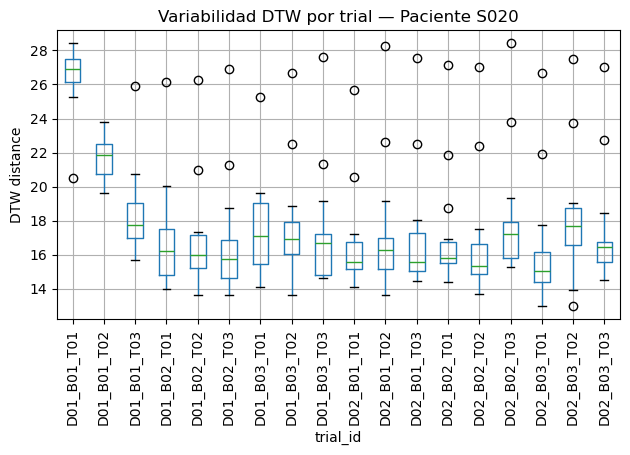

<Figure size 600x400 with 0 Axes>

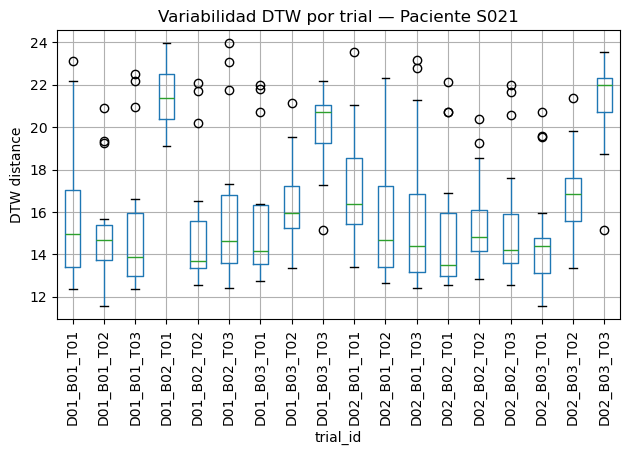

<Figure size 600x400 with 0 Axes>

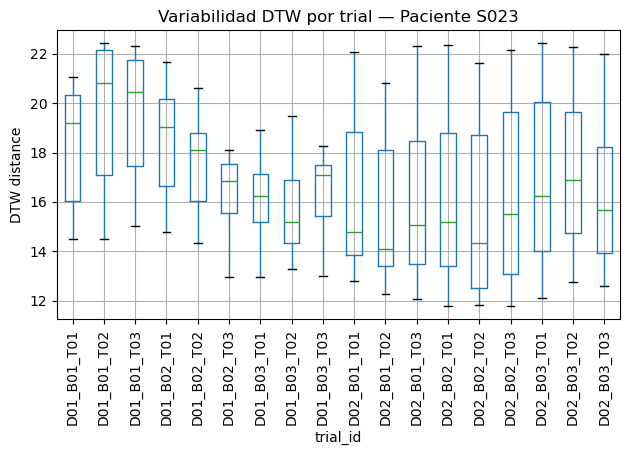

<Figure size 600x400 with 0 Axes>

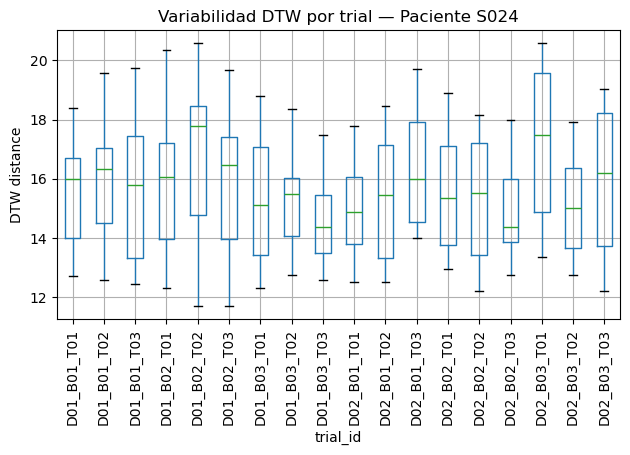

<Figure size 600x400 with 0 Axes>

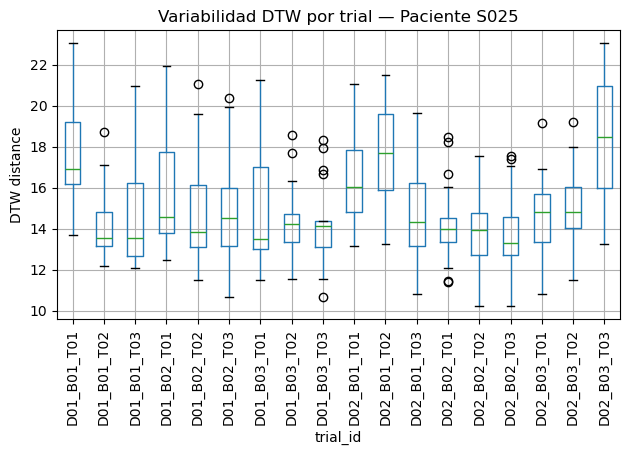

<Figure size 600x400 with 0 Axes>

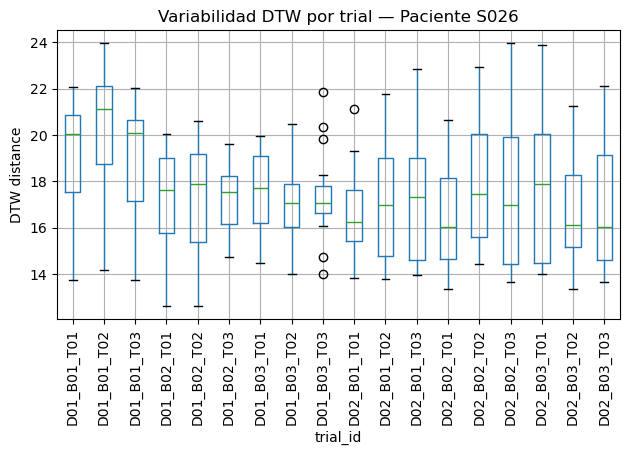

<Figure size 600x400 with 0 Axes>

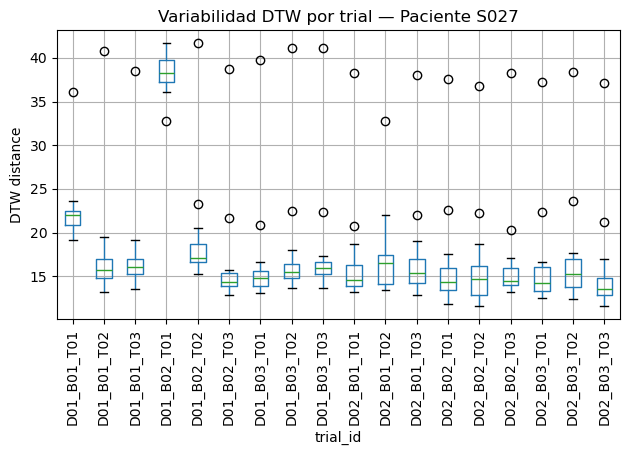

<Figure size 600x400 with 0 Axes>

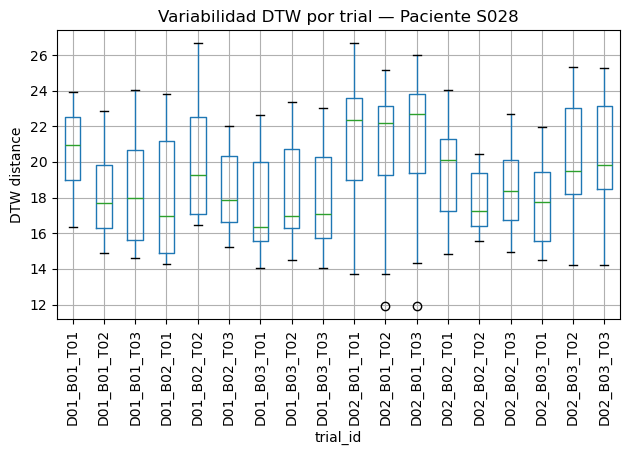

<Figure size 600x400 with 0 Axes>

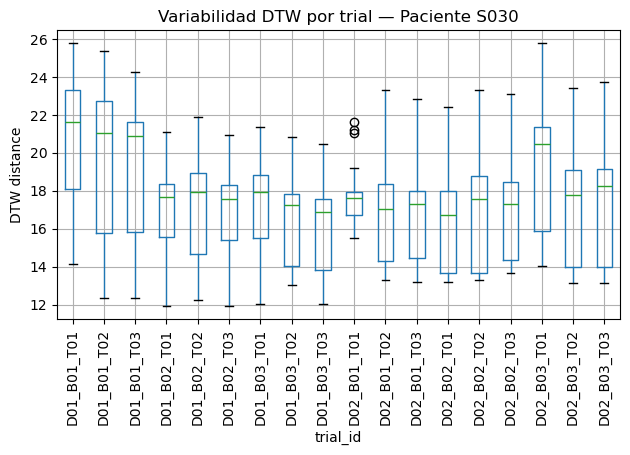

<Figure size 600x400 with 0 Axes>

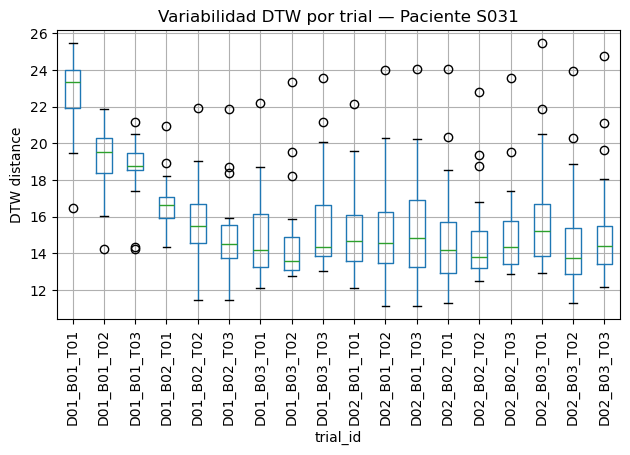

<Figure size 600x400 with 0 Axes>

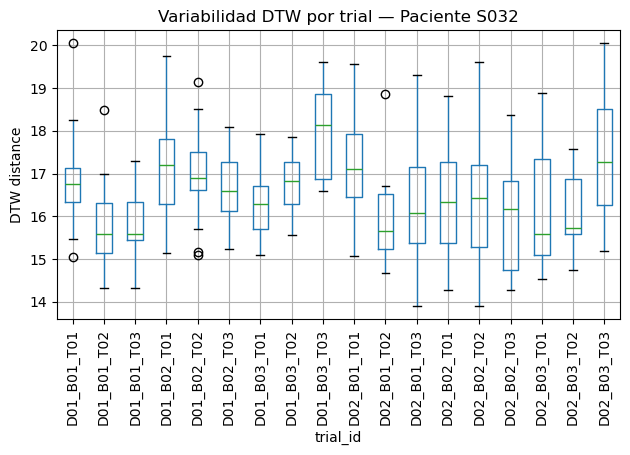

<Figure size 600x400 with 0 Axes>

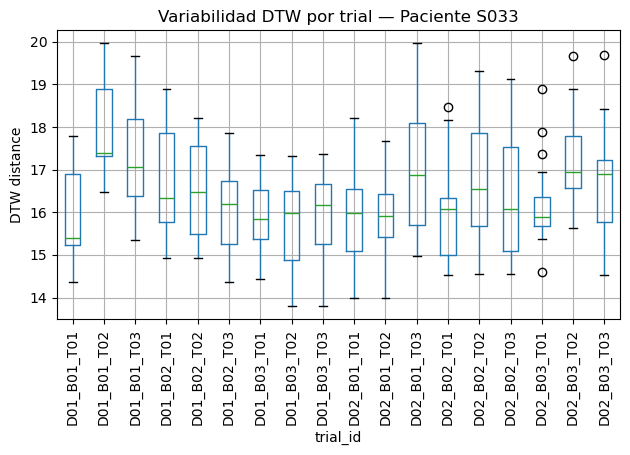

<Figure size 600x400 with 0 Axes>

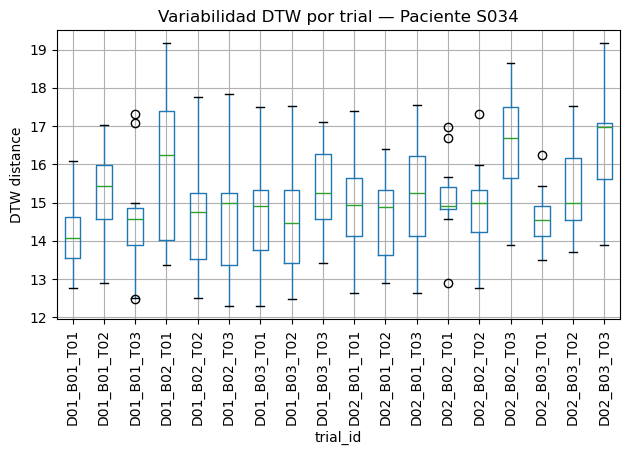

<Figure size 600x400 with 0 Axes>

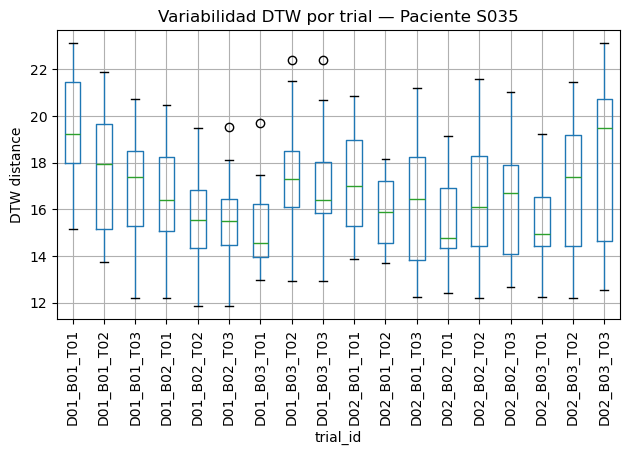

<Figure size 600x400 with 0 Axes>

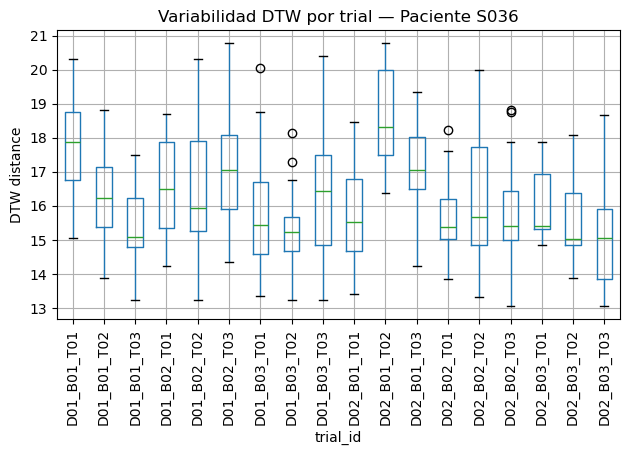

<Figure size 600x400 with 0 Axes>

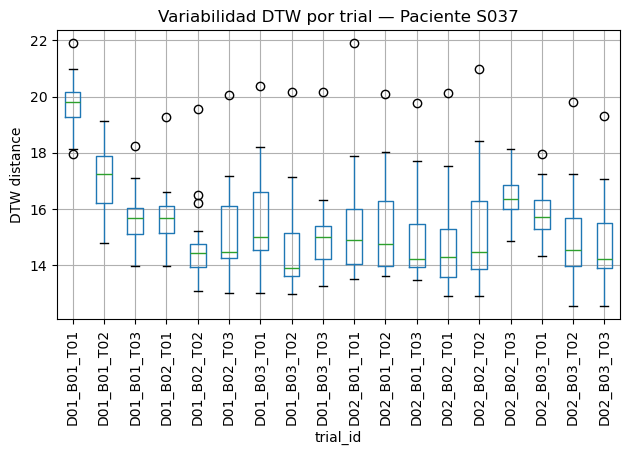

<Figure size 600x400 with 0 Axes>

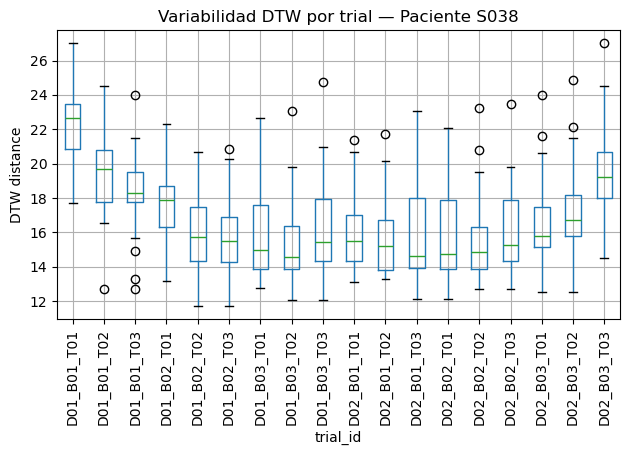

<Figure size 600x400 with 0 Axes>

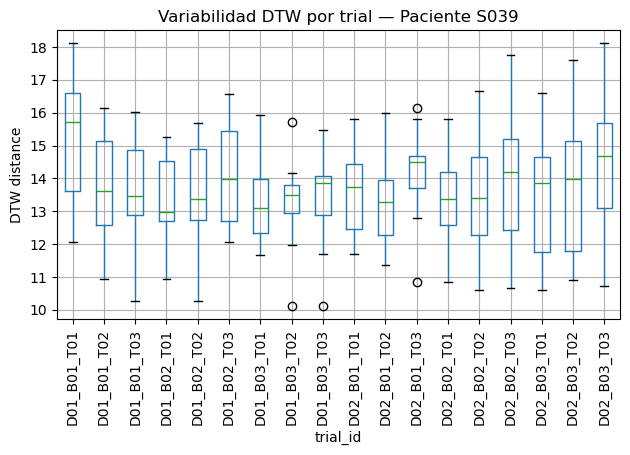

<Figure size 600x400 with 0 Axes>

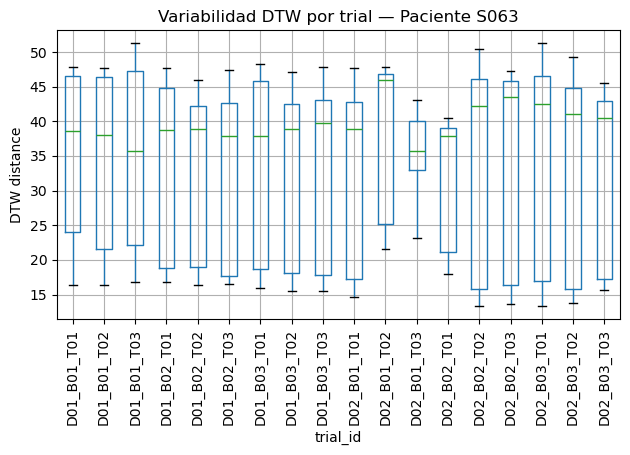

In [4]:
#Analysis for DTW not segmented
df = pd.read_csv('DTW/dtw_ns_normalized_G01.csv')

records = []
for pid, sub in df.groupby('patient_id'):
    # for each patient, create a record for each trial pair
    for _, row in sub.iterrows():
        records.append({'patient_id': pid,
                        'trial_id': row['trial_i'],
                        'dtw': row['dtw_distance']})
        records.append({'patient_id': pid,
                        'trial_id': row['trial_j'],
                        'dtw': row['dtw_distance']})

df_long = pd.DataFrame(records)

# Group by patient and trial, calculating DTW statistics
summary = df_long.groupby(['patient_id','trial_id'])['dtw'].agg(
    MeanDTW = 'mean',
    MedDTW  = 'median',
    StdDTW  = 'std',
    MaxDTW  = 'max',
    MinDTW  = 'min',
    Count   = 'count'
).reset_index()


for pid in summary['patient_id'].unique():
    dfp = summary[summary['patient_id']==pid].sort_values('MeanDTW')
    plt.figure(figsize=(6,4))
    labels = [re.sub(r'^.*?(D.*)$', r'\1', tid) for tid in dfp['trial_id']]
    plt.bar(labels, dfp['MeanDTW'])
    plt.title(f'Mean DTW por trial — Paciente {pid}')
    plt.xlabel('Trial')
    plt.ylabel('Mean DTW')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

for pid in df_long['patient_id'].unique():
    plt.figure(figsize=(6,4))
    dfp = df_long[df_long['patient_id']==pid]
    box = dfp.boxplot(column='dtw', by='trial_id', rot=90)
    labels = [re.sub(r'^.*?(D.*)$', r'\1', label.get_text()) for label in box.get_xticklabels()]
    box.set_xticklabels(labels, rotation=90)
    plt.title(f'Variabilidad DTW por trial — Paciente {pid}')
    plt.suptitle('')
    plt.ylabel('DTW distance')
    plt.tight_layout()
    plt.show()

